## Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

## Carga de datos

In [2]:
df = pd.read_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\final\\s10_final.csv", parse_dates =["date"])

In [3]:
df

,league,playoffs,date,game,patch,gamelength,blue_playerid,result,firstblood,firstdragon,...,blue_totalgold_diff,red_totalgold_diff,blue_earnedgold_diff,red_earnedgold_diff,blue_spentgold_diff,red_spentgold_diff,blue_gold_diffat10,red_gold_diffat10,blue_gold_diffat15,red_gold_diffat15
0,LPL,False,2020-01-13 09:22:00,1,10.10,2640,Invictus Gaming,True,False,False,...,7248,-7248,7248,-7248,4400.0,-4400.0,-833.0,833.0,-959.0,959.0
1,LPL,False,2020-01-13 11:26:00,1,10.10,2283,LGD Gaming,True,True,False,...,2619,-2619,2619,-2619,283.0,-283.0,752.0,-752.0,2011.0,-2011.0
2,LPL,False,2020-01-13 11:31:00,3,10.10,1943,Invictus Gaming,True,False,True,...,6987,-6987,6987,-6987,188.0,-188.0,-486.0,486.0,-585.0,585.0
3,LPL,False,2020-01-13 12:29:00,2,10.10,1517,LNG Esports,True,True,True,...,11474,-11474,11474,-11474,5095.0,-5095.0,462.0,-462.0,5299.0,-5299.0
4,LPL,False,2020-01-13 13:17:00,3,10.10,2116,LGD Gaming,False,True,False,...,-8580,8580,-8580,8580,-4215.0,4215.0,1802.0,-1802.0,1436.0,-1436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4817,EM,False,2020-08-18 20:25:00,1,10.16,2075,Racoon,True,False,True,...,8876,-8876,8876,-8876,817.0,-817.0,174.0,-174.0,2449.0,-2449.0
4818,EM,False,2020-08-18 20:27:00,1,10.16,2095,SINNERS Esports,True,False,False,...,12132,-12132,12132,-12132,10283.0,-10283.0,1986.0,-1986.0,4220.0,-4220.0
4819,EM,False,2020-08-18 20:53:00,1,10.16,2879,Team GamerLegion,True,True,False,...,4394,-4394,4394,-4394,5259.0,-5259.0,-95.0,95.0,578.0,-578.0
4820,EM,False,2020-08-18 20:56:00,1,10.16,1874,G2 Arctic,True,False,False,...,11708,-11708,11708,-11708,7675.0,-7675.0,884.0,-884.0,1988.0,-1988.0


## Análisis univariante

### Resultado

El primer análisis univariante lo realizaremos sobre nuestra variable objetivo *results*. Esta variable nos habla sobre que lado suele ganar más, siendo *0* victoria de lado *rojo* y *1* victoria de lado *azul*.

In [4]:
a =df["result"][df["result"] == 1].count()
b =df["result"][df["result"] == 0].count()
a, b

(2539, 2283)

Text(0.5, 1.0, 'Victorias por lado')

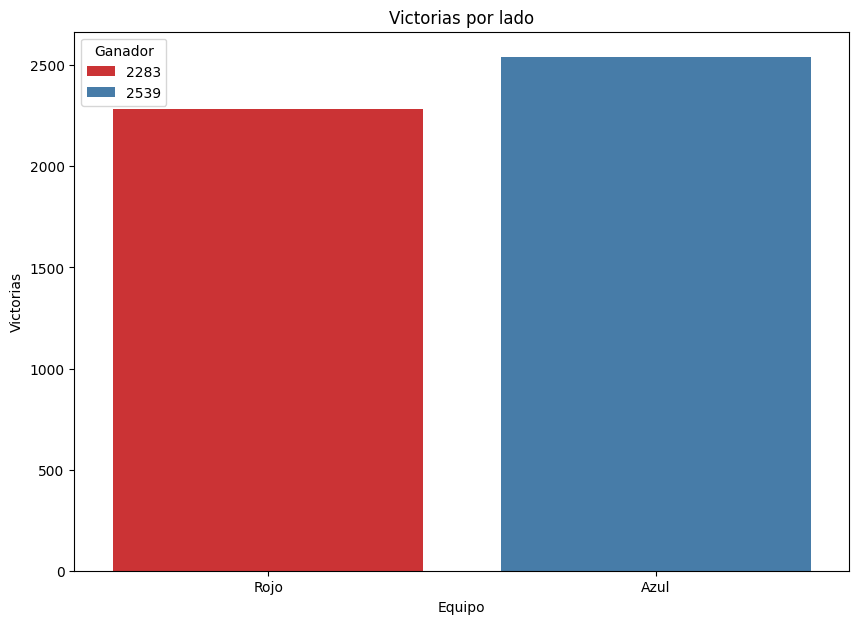

In [5]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df, x="result", hue="result", palette="Set1", legend="auto")
plt.xlabel("Equipo")
plt.ylabel("Victorias")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(title="Ganador", loc="upper left", labels=[b,a])
plt.title("Victorias por lado")

Podemos ver que el lado azul gana más

### Oro acumulado

In [6]:
btg_mean = df["blue_totalgold"].mean()
btg_median = df["blue_totalgold"].median()
btg_mode = stats.mode(df["blue_totalgold"])

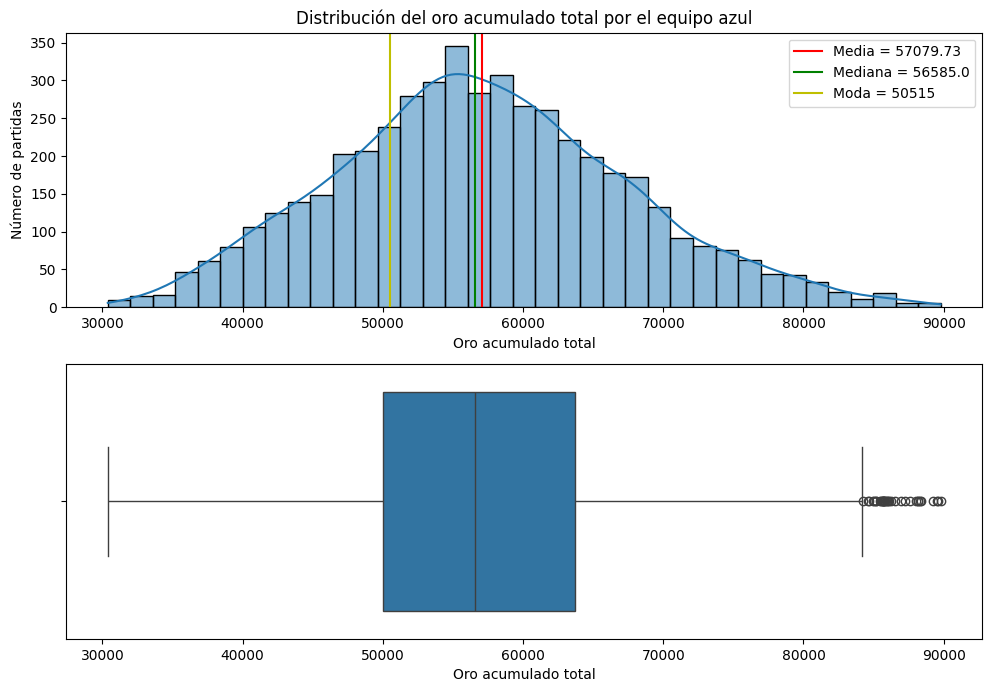

In [7]:
#lado azul

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.histplot(df, x="blue_totalgold", kde=True)
plt.xlabel("Oro acumulado total")
plt.ylabel("Número de partidas")
plt.title("Distribución del oro acumulado total por el equipo azul")
plt.axvline(btg_mean,color = "r", label = f"Media = {round(btg_mean,2)}")
plt.axvline(btg_median,color = "g", label = f"Mediana = {round(btg_median,2)}")
plt.axvline(btg_mode[0],color = "y", label = f"Moda = {round(btg_mode[0],2)}")
plt.legend()

plt.subplot(2,1,2)
sns.boxplot(x = df["blue_totalgold"], legend=True)
plt.xlabel("Oro acumulado total")

plt.tight_layout(pad=1)

In [8]:
rtg_mean = df["red_totalgold"].mean()
rtg_median = df["red_totalgold"].median()
rtg_mode = stats.mode(df["red_totalgold"])

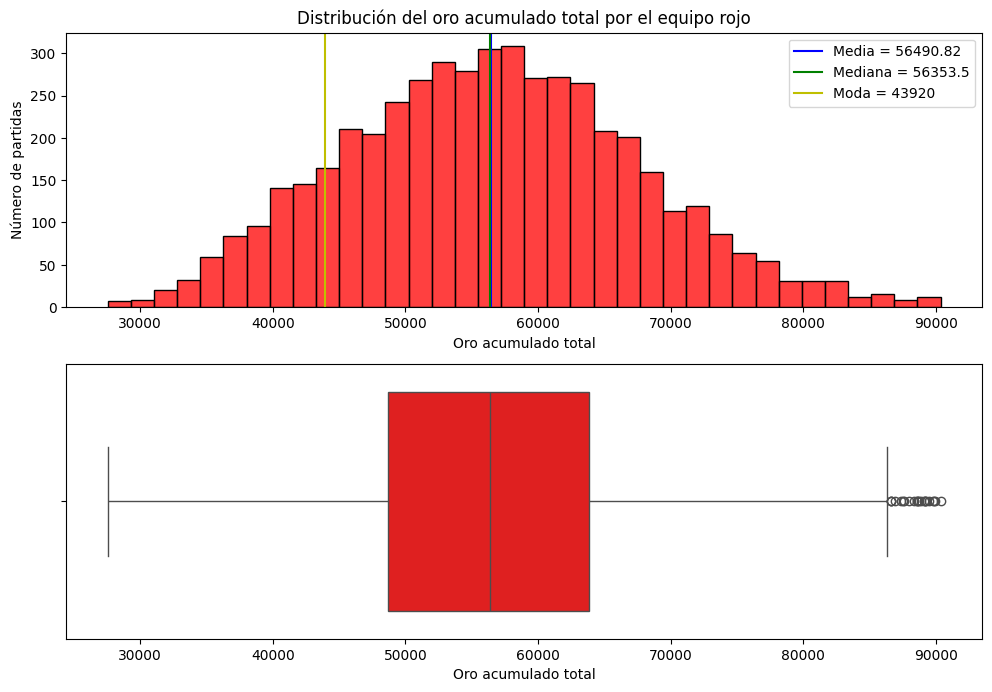

In [9]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.histplot(df, x="red_totalgold", color="red")
plt.xlabel("Oro acumulado total")
plt.ylabel("Número de partidas")
plt.title("Distribución del oro acumulado total por el equipo rojo")
plt.axvline(rtg_mean,color = "b", label = f"Media = {round(rtg_mean,2)}")
plt.axvline(rtg_median,color = "g", label = f"Mediana = {round(rtg_median,2)}")
plt.axvline(rtg_mode[0],color = "y", label = f"Moda = {round(rtg_mode[0],2)}")
plt.legend()

plt.subplot(2,1,2)
sns.boxplot(x = df["red_totalgold"], color="Red")
plt.xlabel("Oro acumulado total")

plt.tight_layout(pad=1)

### Diferenca de oro total

In [10]:
#lado azul
bgd_mean = df["blue_totalgold_diff"].mean()
bgd_median = df["blue_totalgold_diff"].median()
bgd_mode = stats.mode(df["blue_totalgold_diff"])

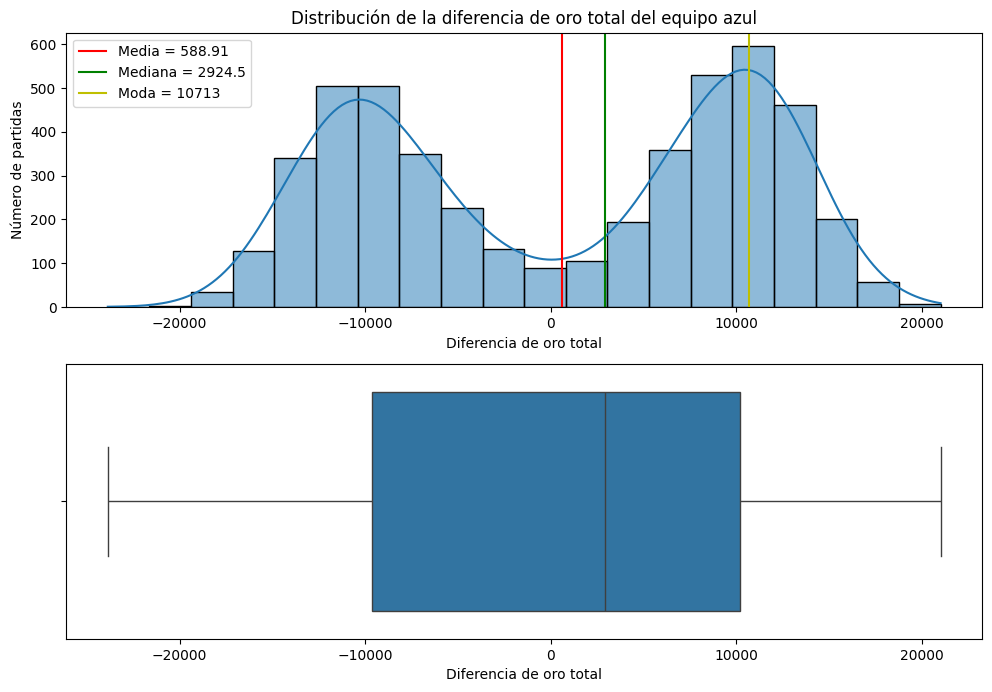

In [11]:
#lado azul

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.histplot(df, x="blue_totalgold_diff", kde=True)
plt.xlabel("Diferencia de oro total")
plt.ylabel("Número de partidas")
plt.title("Distribución de la diferencia de oro total del equipo azul")
plt.axvline(bgd_mean,color = "r", label = f"Media = {round(bgd_mean,2)}")
plt.axvline(bgd_median,color = "g", label = f"Mediana = {round(bgd_median,2)}")
plt.axvline(bgd_mode[0],color = "y", label = f"Moda = {round(bgd_mode[0],2)}")
plt.legend()

plt.subplot(2,1,2)
sns.boxplot(x = df["blue_totalgold_diff"])
plt.xlabel("Diferencia de oro total")

plt.tight_layout(pad=1)

In [12]:
#lado rojo
rgd_mean = df["red_totalgold_diff"].mean()
rgd_median = df["red_totalgold_diff"].median()
rgd_mode = stats.mode(df["red_totalgold_diff"])

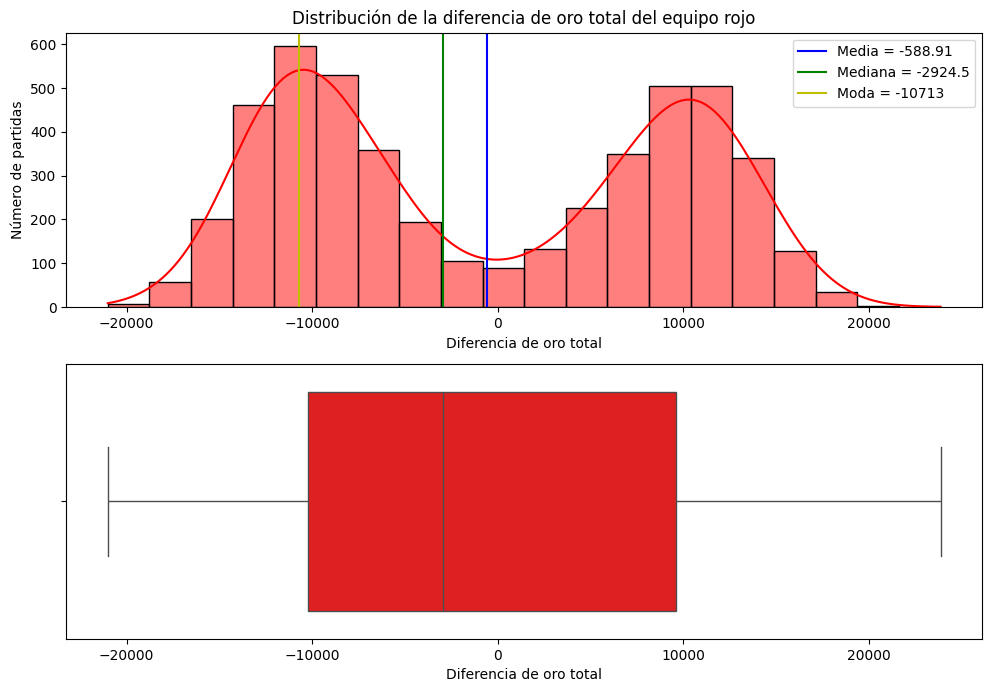

In [13]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.histplot(df, x="red_totalgold_diff", kde=True, color="red")
plt.xlabel("Diferencia de oro total")
plt.ylabel("Número de partidas")
plt.title("Distribución de la diferencia de oro total del equipo rojo")
plt.axvline(rgd_mean,color = "b", label = f"Media = {round(rgd_mean,2)}")
plt.axvline(rgd_median,color = "g", label = f"Mediana = {round(rgd_median,2)}")
plt.axvline(rgd_mode[0],color = "y", label = f"Moda = {round(rgd_mode[0],2)}")
plt.legend()

plt.subplot(2,1,2)
sns.boxplot(x = df["red_totalgold_diff"], color="red")
plt.xlabel("Diferencia de oro total")

plt.tight_layout(pad=1)

### Oro gastado

In [14]:
bsg_mean = df["blue_spentgold"].mean()
bsg_median = df["blue_spentgold"].median()
bsg_mode = stats.mode(df["blue_spentgold"])

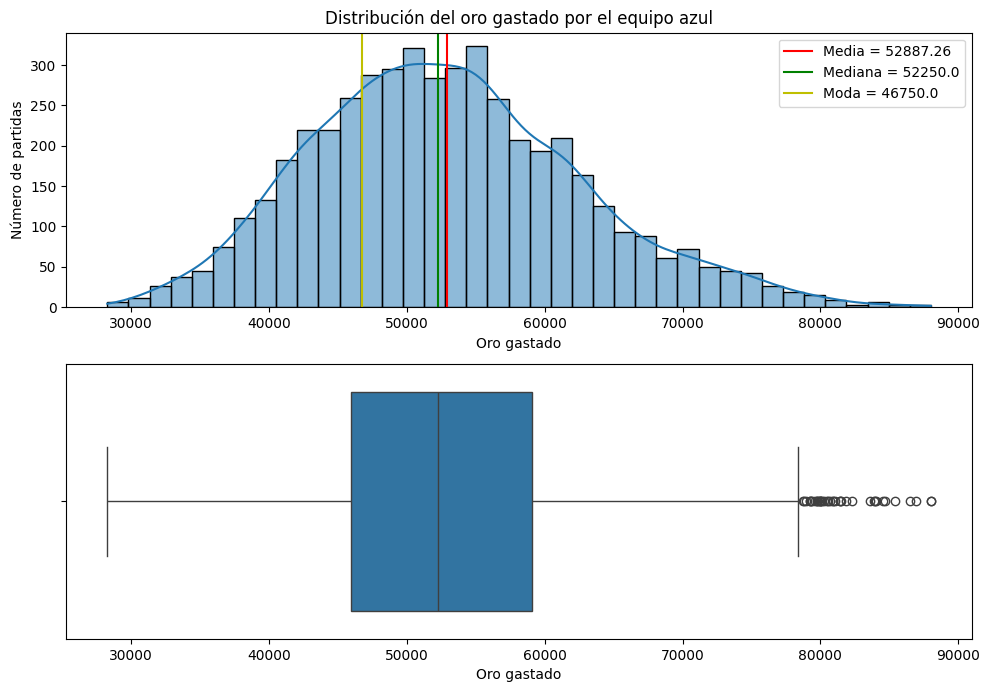

In [15]:
#lado azul

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.histplot(df, x="blue_spentgold", kde=True)
plt.xlabel("Oro gastado")
plt.ylabel("Número de partidas")
plt.title("Distribución del oro gastado por el equipo azul")
plt.axvline(bsg_mean,color = "r", label = f"Media = {round(bsg_mean,2)}")
plt.axvline(bsg_median,color = "g", label = f"Mediana = {round(bsg_median,2)}")
plt.axvline(bsg_mode[0],color = "y", label = f"Moda = {round(bsg_mode[0],2)}")
plt.legend()

plt.subplot(2,1,2)
sns.boxplot(x = df["blue_spentgold"], legend=True)
plt.xlabel("Oro gastado")

plt.tight_layout(pad=1)

In [16]:
rsg_mean = df["red_spentgold"].mean()
rsg_median = df["red_spentgold"].median()
rsg_mode = stats.mode(df["red_spentgold"])

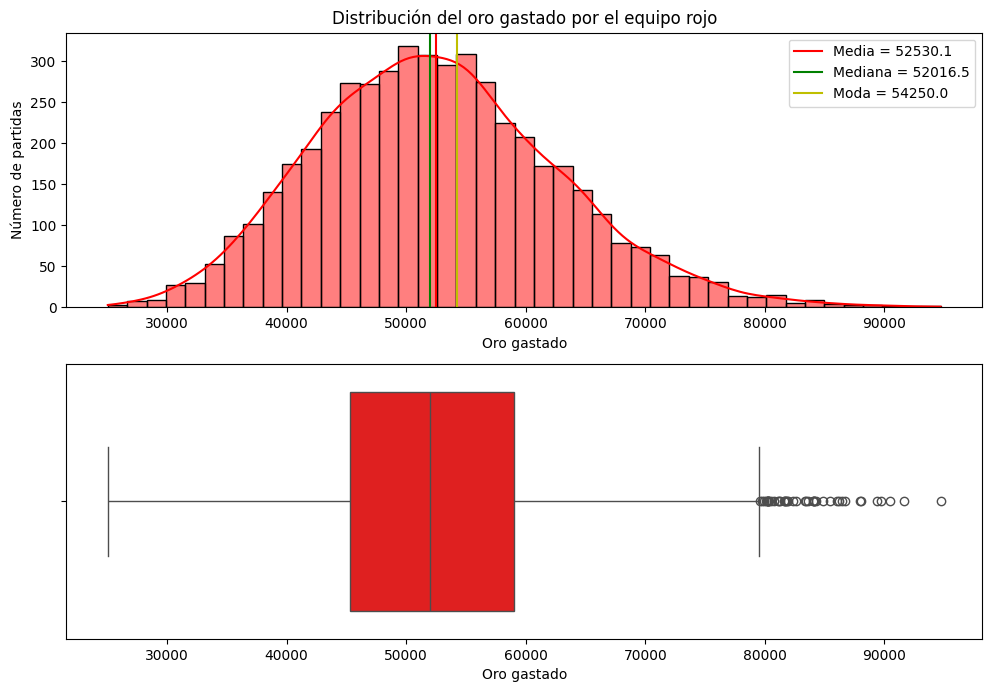

In [17]:
#lado rojo

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.histplot(df, x="red_spentgold", kde=True, color= "red")
plt.xlabel("Oro gastado")
plt.ylabel("Número de partidas")
plt.title("Distribución del oro gastado por el equipo rojo")
plt.axvline(rsg_mean,color = "r", label = f"Media = {round(rsg_mean,2)}")
plt.axvline(rsg_median,color = "g", label = f"Mediana = {round(rsg_median,2)}")
plt.axvline(rsg_mode[0],color = "y", label = f"Moda = {round(rsg_mode[0],2)}")
plt.legend()

plt.subplot(2,1,2)
sns.boxplot(x = df["red_spentgold"], legend=True, color = "Red")
plt.xlabel("Oro gastado")

plt.tight_layout(pad=1)

### Diferencia de oro gastado

In [18]:
#lado azul
bgsd_mean = df["blue_spentgold_diff"].mean()
bgsd_median = df["blue_spentgold_diff"].median()
bgsd_mode = stats.mode(df["blue_spentgold_diff"])

Text(0.5, 0, 'Diferencia de oro gastado')

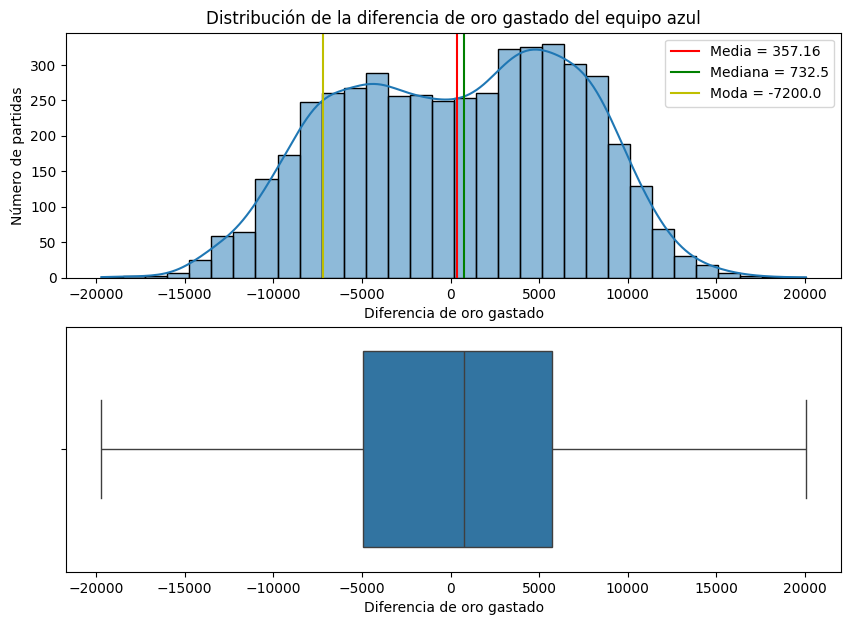

In [19]:
#lado azul

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.histplot(df, x="blue_spentgold_diff", kde=True)
plt.xlabel("Diferencia de oro gastado")
plt.ylabel("Número de partidas")
plt.title("Distribución de la diferencia de oro gastado del equipo azul")
plt.axvline(bgsd_mean,color = "r", label = f"Media = {round(bgsd_mean,2)}")
plt.axvline(bgsd_median,color = "g", label = f"Mediana = {round(bgsd_median,2)}")
plt.axvline(bgsd_mode[0],color = "y", label = f"Moda = {round(bgsd_mode[0],2)}")
plt.legend()

plt.subplot(2,1,2)
sns.boxplot(x = df["blue_spentgold_diff"])
plt.xlabel("Diferencia de oro gastado")

In [20]:
#lado rojo
rsdg_mean = df["red_spentgold_diff"].mean()
rsdg_median = df["red_spentgold_diff"].median()
rsdg_mode = stats.mode(df["red_spentgold_diff"])

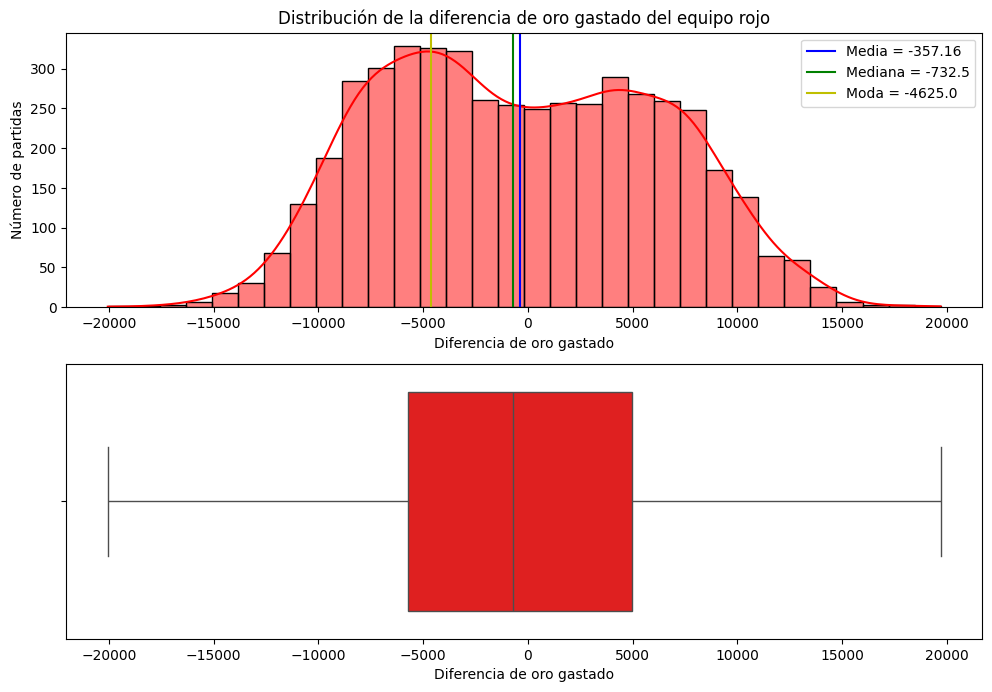

In [21]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.histplot(df, x="red_spentgold_diff", kde=True, color="red")
plt.xlabel("Diferencia de oro gastado")
plt.ylabel("Número de partidas")
plt.title("Distribución de la diferencia de oro gastado del equipo rojo")
plt.axvline(rsdg_mean,color = "b", label = f"Media = {round(rsdg_mean,2)}")
plt.axvline(rsdg_median,color = "g", label = f"Mediana = {round(rsdg_median,2)}")
plt.axvline(rsdg_mode[0],color = "y", label = f"Moda = {round(rsdg_mode[0],2)}")
plt.legend()

plt.subplot(2,1,2)
sns.boxplot(x = df["red_spentgold_diff"], color="red")
plt.xlabel("Diferencia de oro gastado")

plt.tight_layout(pad=1)

### Torretas

Cantidad de torretas por partida

In [22]:
btowers_median = df["blue_towers"].median()
btowers_mode = stats.mode(df["blue_towers"])

rtowers_median = df["red_towers"].median()
rtowers_mode = stats.mode(df["red_towers"])

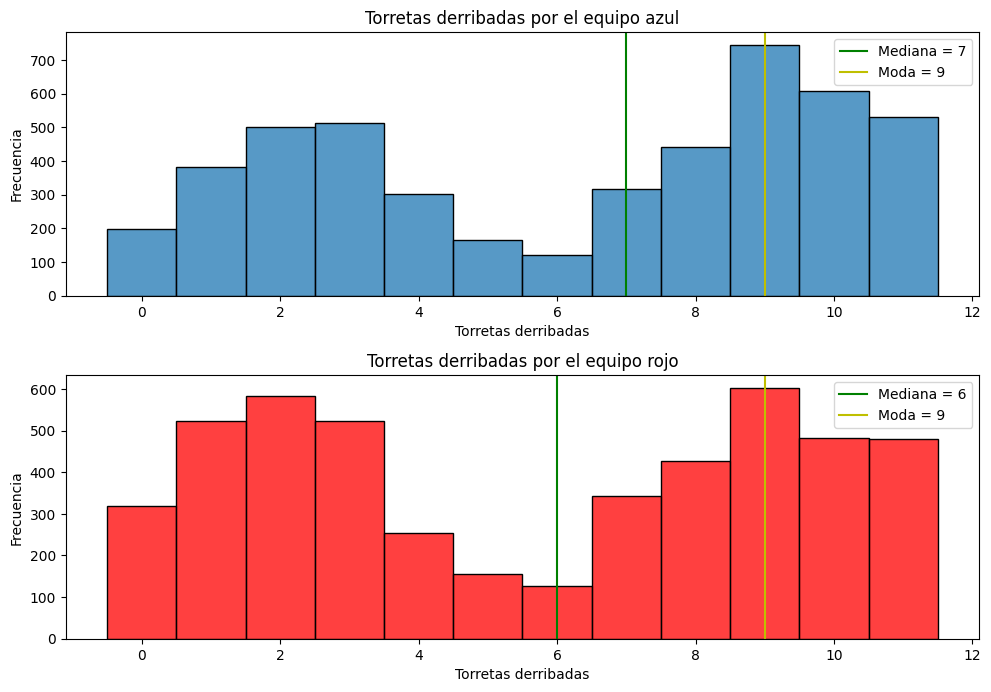

In [23]:
plt.figure(figsize=(10,7))

#lado azul
plt.subplot(2,1,1)
sns.histplot(df, x="blue_towers", discrete=True)
plt.xlabel("Torretas derribadas")
plt.ylabel("Frecuencia")
plt.axvline(btowers_median,color = "g", label = f"Mediana = {int(btowers_median)}")
plt.axvline(btowers_mode[0],color = "y", label = f"Moda = {int(btowers_mode[0])}")
plt.legend()
plt.title("Torretas derribadas por el equipo azul")

#lado rojo
plt.subplot(2,1,2)
sns.histplot(df, x="red_towers", discrete=True, color="red")
plt.xlabel("Torretas derribadas")
plt.ylabel("Frecuencia")
plt.axvline(rtowers_median,color = "g", label = f"Mediana = {int(rtowers_median)}")
plt.axvline(rtowers_mode[0],color = "y", label = f"Moda = {int(rtowers_mode[0])}")
plt.legend()
plt.title("Torretas derribadas por el equipo rojo")


plt.tight_layout(pad=1)

Primera torreta

In [24]:
bft =df["firsttower"][df["firsttower"] == 1].count()
rft =df["firsttower"][df["firsttower"] == 0].count()

Text(0.5, 1.0, 'Primera torrera de la partida derribada por lado')

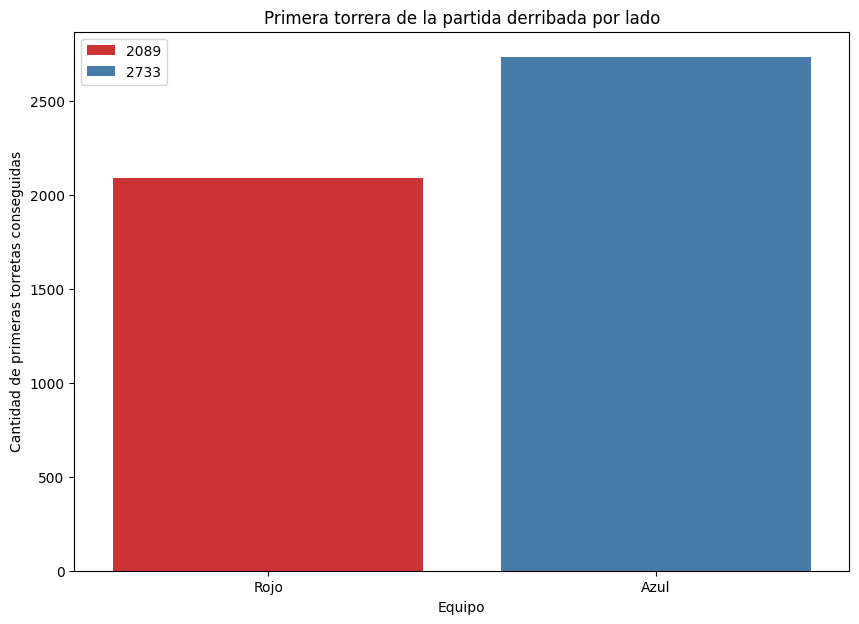

In [25]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df, x="firsttower", hue="firsttower", palette="Set1", legend="auto")
plt.xlabel("Equipo")
plt.ylabel("Cantidad de primeras torretas conseguidas")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(loc="upper left", labels=[rft,bft])
plt.title("Primera torrera de la partida derribada por lado")

Torreta de medio

In [26]:
bfmt =df["firstmidtower"][df["firstmidtower"] == 1].count()
rfmt =df["firstmidtower"][df["firstmidtower"] == 0].count()

Text(0.5, 1.0, 'Primera torrera de medio derribada por lado')

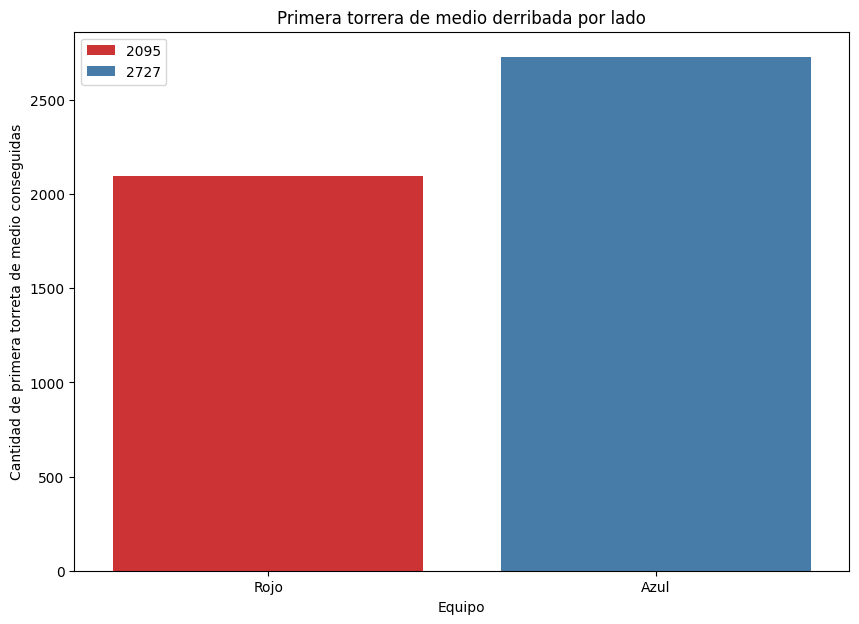

In [27]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df, x="firstmidtower", hue="firstmidtower", palette="Set1", legend="auto")
plt.xlabel("Equipo")
plt.ylabel("Cantidad de primera torreta de medio conseguidas")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(loc="upper left", labels=[rfmt,bfmt])
plt.title("Primera torrera de medio derribada por lado")

Anillo exterior de torretas

In [28]:
bf3 =df["firsttothreetowers"][df["firsttothreetowers"] == 1].count()
rf3 =df["firsttothreetowers"][df["firsttothreetowers"] == 0].count()

Text(0.5, 1.0, 'Anillo exterior de torrertas derribado primero')

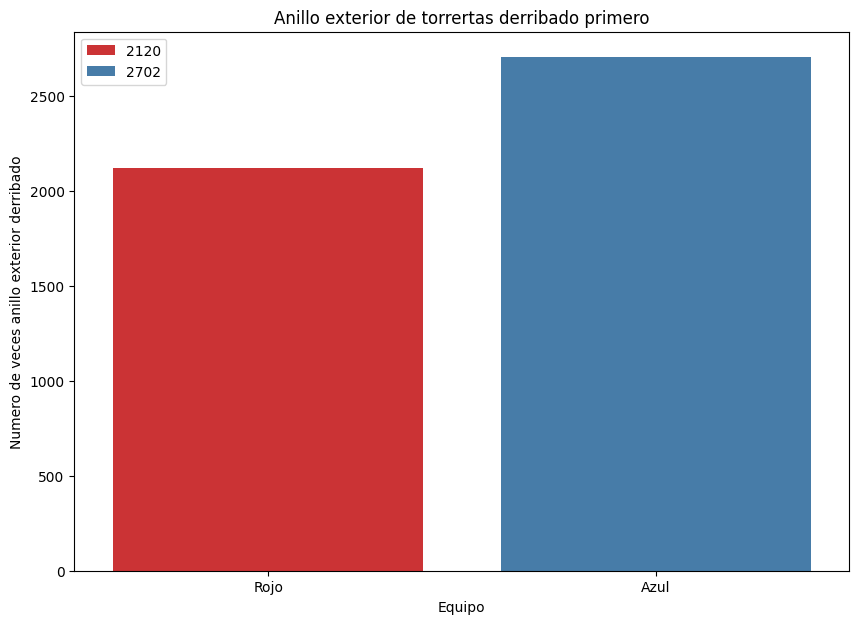

In [29]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df, x="firsttothreetowers", hue="firsttothreetowers", palette="Set1", legend="auto")
plt.xlabel("Equipo")
plt.ylabel("Numero de veces anillo exterior derribado")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(loc="upper left", labels=[rf3,bf3])
plt.title("Anillo exterior de torrertas derribado primero")

### Heraldos

Primer heraldo

In [30]:
bfh =df["firstherald"][df["firstherald"] == 1].count()
rfh =df["firstherald"][df["firstherald"] == 0].count()

Text(0.5, 1.0, 'Primer heraldo por equipo')

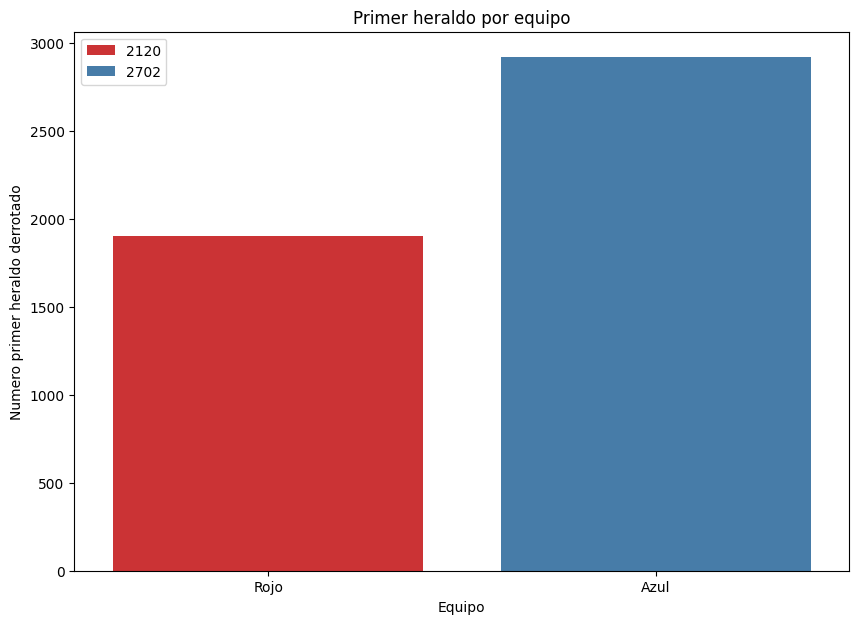

In [31]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df, x="firstherald", hue="firstherald", palette="Set1", legend="auto")
plt.xlabel("Equipo")
plt.ylabel("Numero primer heraldo derrotado")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(loc="upper left", labels=[rf3,bf3])
plt.title("Primer heraldo por equipo")

Numero de heraldos

In [32]:
bheralds_median = df["blue_heralds"].median()
bheralds_mode = stats.mode(df["blue_heralds"])

rheralds_median = df["red_heralds"].median()
rheralds_mode = stats.mode(df["red_heralds"])

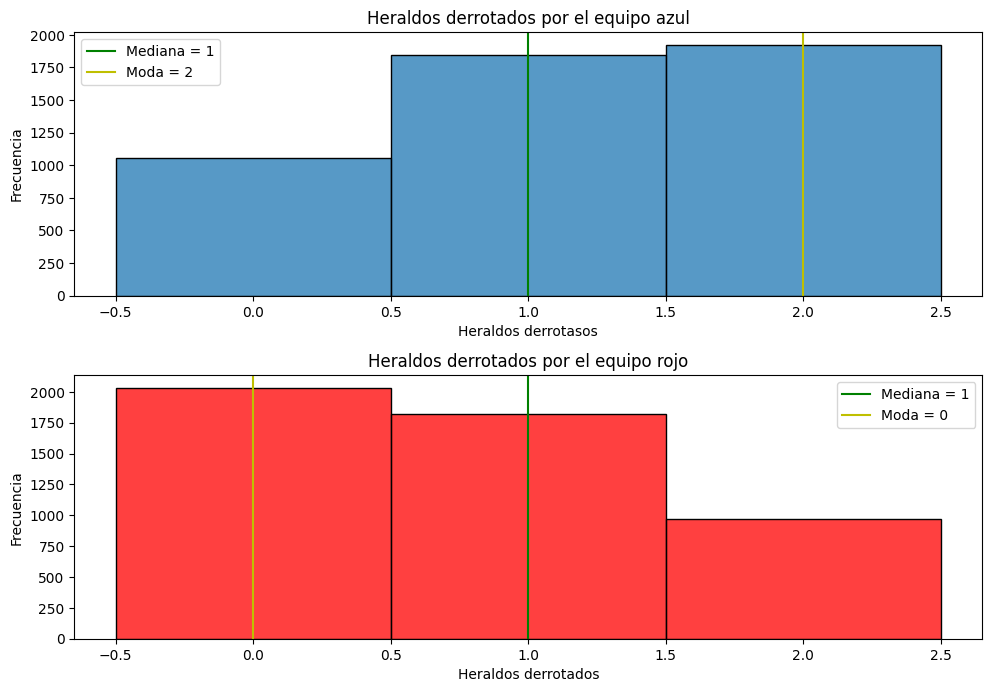

In [33]:
plt.figure(figsize=(10,7))

#lado azul
plt.subplot(2,1,1)
sns.histplot(df, x="blue_heralds", discrete=True)
plt.xlabel("Heraldos derrotasos")
plt.ylabel("Frecuencia")
plt.axvline(bheralds_median,color = "g", label = f"Mediana = {int(bheralds_median)}")
plt.axvline(bheralds_mode[0],color = "y", label = f"Moda = {int(bheralds_mode[0])}")
plt.legend()
plt.title("Heraldos derrotados por el equipo azul")

#lado rojo
plt.subplot(2,1,2)
sns.histplot(df, x="red_heralds", discrete=True, color="red")
plt.xlabel("Heraldos derrotados")
plt.ylabel("Frecuencia")
plt.axvline(rheralds_median,color = "g", label = f"Mediana = {int(rheralds_median)}")
plt.axvline(rheralds_mode[0],color = "y", label = f"Moda = {int(rheralds_mode[0])}")
plt.legend()
plt.title("Heraldos derrotados por el equipo rojo")


plt.tight_layout(pad=1)

### Barones

Primer baron

In [34]:
bfb =df["firstbaron"][df["firstbaron"] == 1].count()
rfb =df["firstbaron"][df["firstbaron"] == 0].count()

Text(0.5, 1.0, 'Primer baron por equipo')

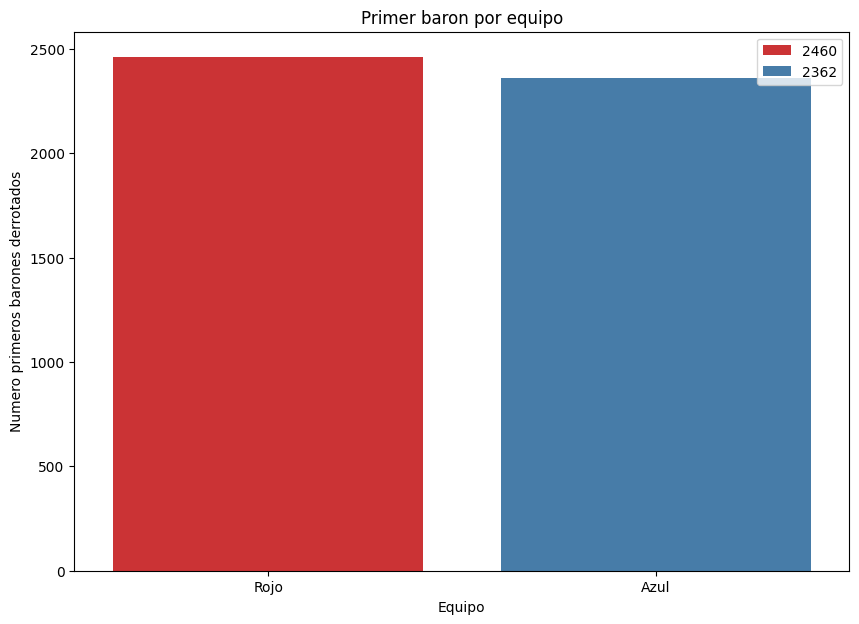

In [35]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df, x="firstbaron", hue="firstbaron", palette="Set1", legend="auto")
plt.xlabel("Equipo")
plt.ylabel("Numero primeros barones derrotados")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(loc="upper right", labels=[rfb,bfb])
plt.title("Primer baron por equipo")

Numero de barones

In [36]:
bbarons_median = df["blue_barons"].median()
bbarons_mode = stats.mode(df["blue_barons"])

rbarons_median = df["red_barons"].median()
rbarons_mode = stats.mode(df["red_barons"])

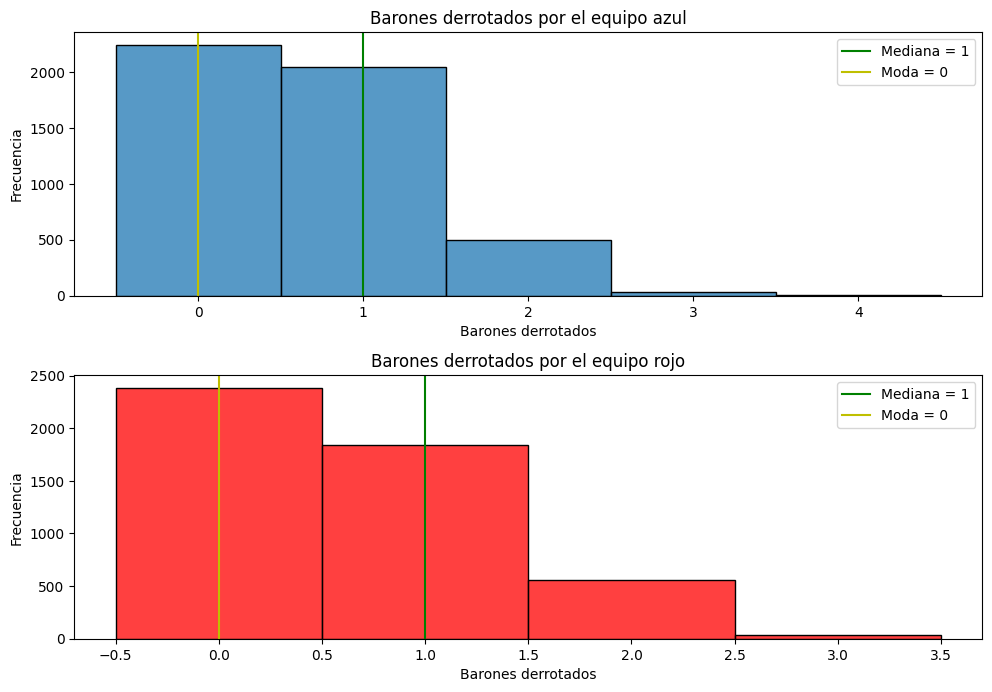

In [37]:
plt.figure(figsize=(10,7))

#lado azul
plt.subplot(2,1,1)
sns.histplot(df, x="blue_barons", discrete=True)
plt.xlabel("Barones derrotados")
plt.ylabel("Frecuencia")
plt.axvline(bbarons_median,color = "g", label = f"Mediana = {int(bbarons_median)}")
plt.axvline(bbarons_mode[0],color = "y", label = f"Moda = {int(bbarons_mode[0])}")
plt.legend()
plt.title("Barones derrotados por el equipo azul")

#lado rojo
plt.subplot(2,1,2)
sns.histplot(df, x="red_barons", discrete=True, color="red")
plt.xlabel("Barones derrotados")
plt.ylabel("Frecuencia")
plt.axvline(rbarons_median,color = "g", label = f"Mediana = {int(rbarons_median)}")
plt.axvline(rbarons_mode[0],color = "y", label = f"Moda = {int(rbarons_mode[0])}")
plt.legend()
plt.title("Barones derrotados por el equipo rojo")


plt.tight_layout(pad=1)

### Dragones

Primer dragon

In [38]:
bfd =df["firstdragon"][df["firstdragon"] == 1].count()
rfd =df["firstdragon"][df["firstdragon"] == 0].count()

Text(0.5, 1.0, 'Primer dragon por equipo')

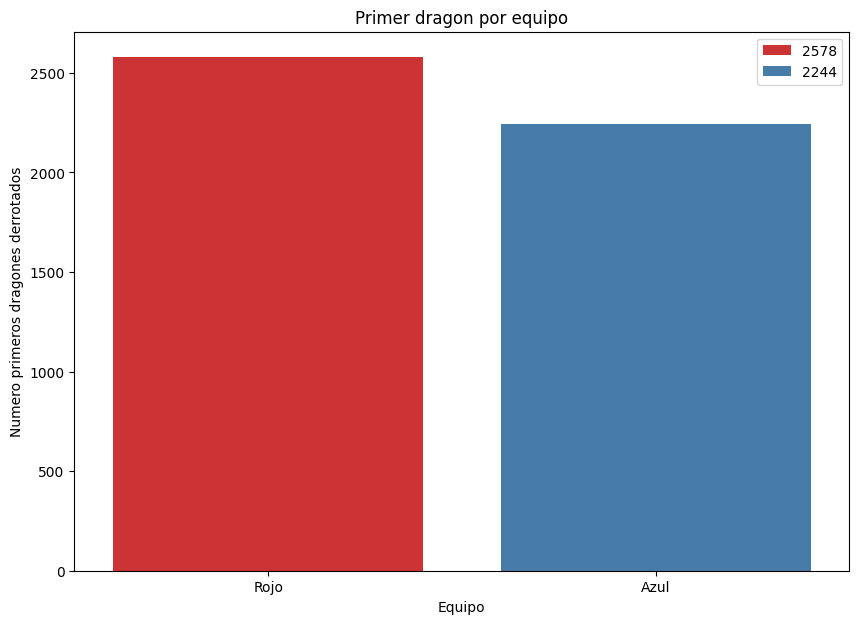

In [39]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df, x="firstdragon", hue="firstdragon", palette="Set1", legend="auto")
plt.xlabel("Equipo")
plt.ylabel("Numero primeros dragones derrotados")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(loc="upper right", labels=[rfd,bfd])
plt.title("Primer dragon por equipo")

Dragones elementales

In [40]:
belemental_median = df["blue_elementaldrakes"].median()
belemental_mode = stats.mode(df["blue_elementaldrakes"])

relemental_median = df["red_elementaldrakes"].median()
relemental_mode = stats.mode(df["red_elementaldrakes"])

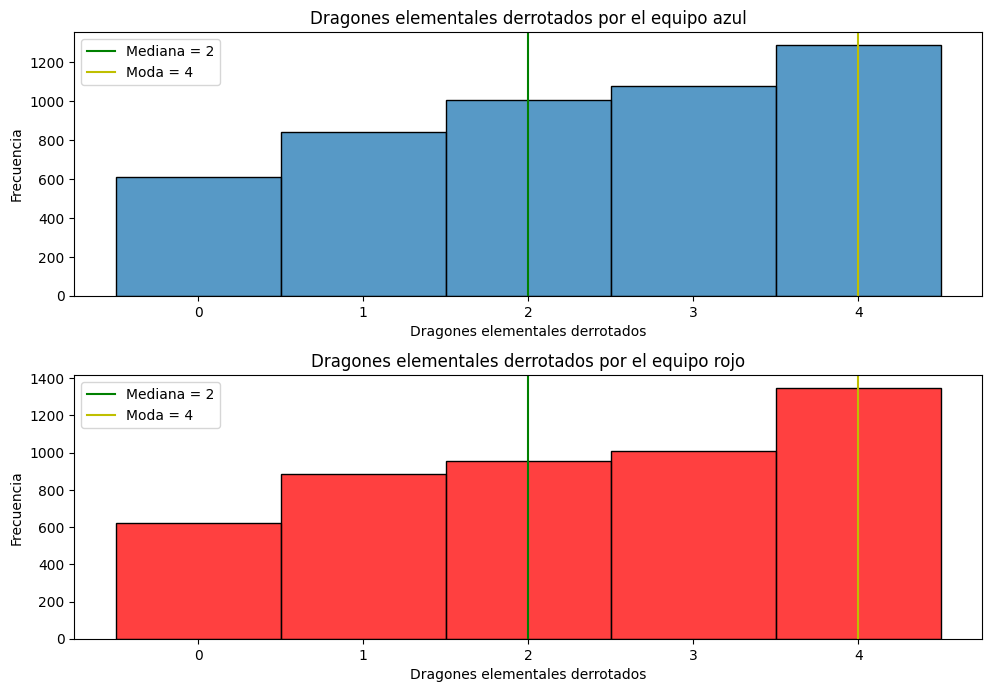

In [41]:
plt.figure(figsize=(10,7))

#lado azul
plt.subplot(2,1,1)
sns.histplot(df, x="blue_elementaldrakes", discrete=True)
plt.xlabel("Dragones elementales derrotados")
plt.ylabel("Frecuencia")
plt.axvline(belemental_median,color = "g", label = f"Mediana = {int(belemental_median)}")
plt.axvline(belemental_mode[0],color = "y", label = f"Moda = {int(belemental_mode[0])}")
plt.legend()
plt.title("Dragones elementales derrotados por el equipo azul")

#lado rojo
plt.subplot(2,1,2)
sns.histplot(df, x="red_elementaldrakes", discrete=True, color="red")
plt.xlabel("Dragones elementales derrotados")
plt.ylabel("Frecuencia")
plt.axvline(relemental_median,color = "g", label = f"Mediana = {int(relemental_median)}")
plt.axvline(relemental_mode[0],color = "y", label = f"Moda = {int(relemental_mode[0])}")
plt.legend()
plt.title("Dragones elementales derrotados por el equipo rojo")


plt.tight_layout(pad=1)

Dragones ancianos

In [42]:
belders_median = df["blue_elders"].median()
belders_mode = stats.mode(df["blue_elders"])

relders_median = df["red_elders"].median()
relders_mode = stats.mode(df["red_elders"])

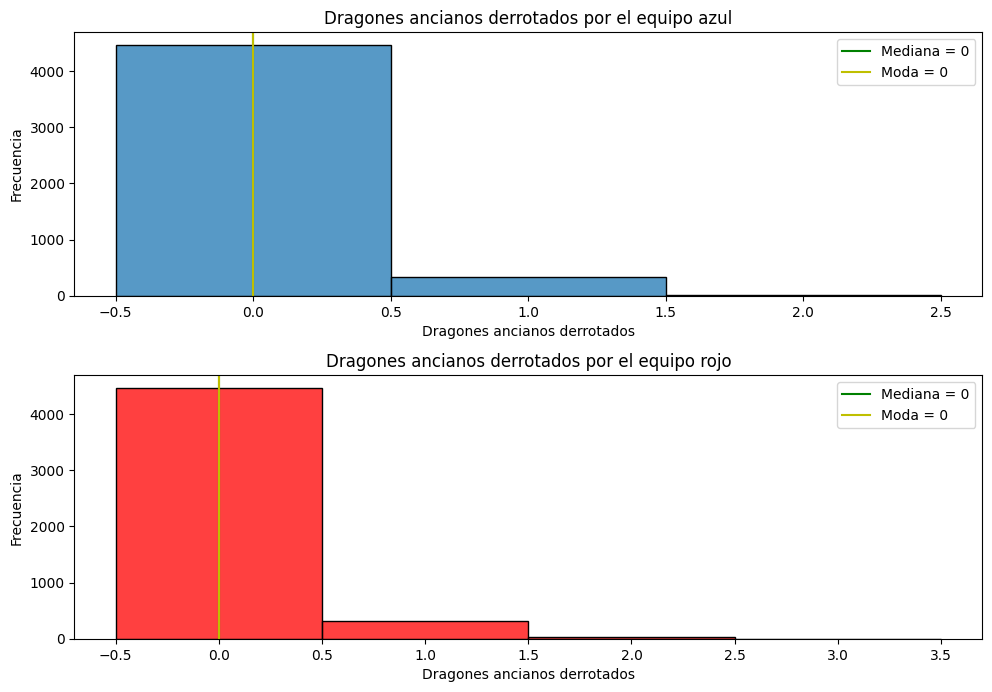

In [43]:
plt.figure(figsize=(10,7))

#lado azul
plt.subplot(2,1,1)
sns.histplot(df, x="blue_elders", discrete=True)
plt.xlabel("Dragones ancianos derrotados")
plt.ylabel("Frecuencia")
plt.axvline(belders_median,color = "g", label = f"Mediana = {int(belders_median)}")
plt.axvline(belders_mode[0],color = "y", label = f"Moda = {int(belders_mode[0])}")
plt.legend()
plt.title("Dragones ancianos derrotados por el equipo azul")

#lado rojo
plt.subplot(2,1,2)
sns.histplot(df, x="red_elders", discrete=True, color="red")
plt.xlabel("Dragones ancianos derrotados")
plt.ylabel("Frecuencia")
plt.axvline(relders_median,color = "g", label = f"Mediana = {int(relders_median)}")
plt.axvline(relders_mode[0],color = "y", label = f"Moda = {int(relders_mode[0])}")
plt.legend()
plt.title("Dragones ancianos derrotados por el equipo rojo")


plt.tight_layout(pad=1)

Dragones totales

In [44]:
bdragons_median = df["blue_dragons"].median()
bdragons_mode = stats.mode(df["blue_dragons"])

rdragons_median = df["red_dragons"].median()
rdragons_mode = stats.mode(df["red_dragons"])

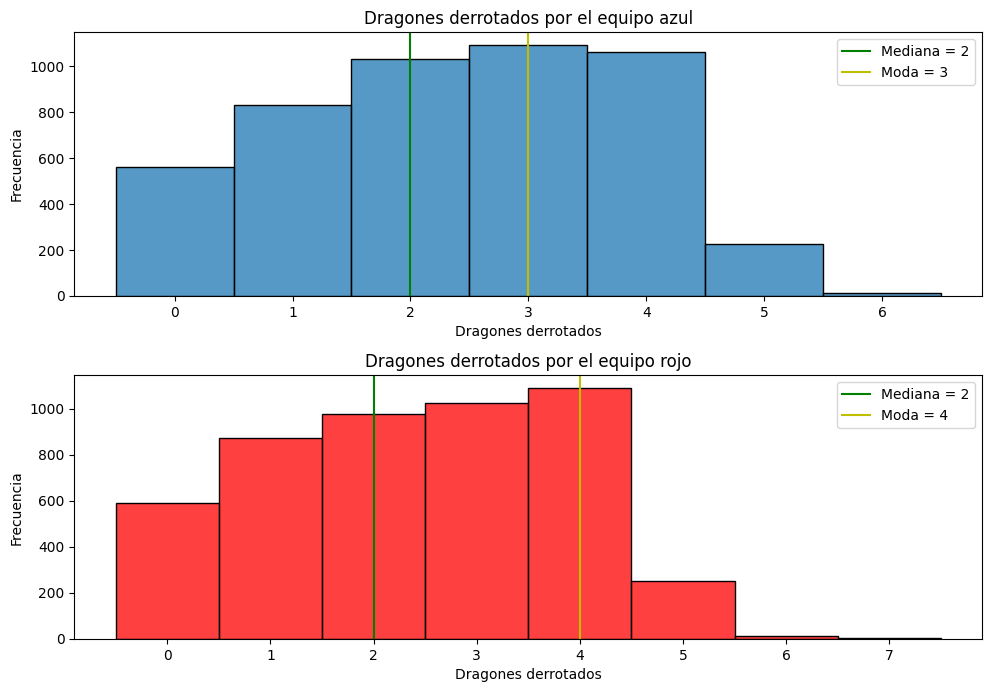

In [45]:
plt.figure(figsize=(10,7))

#lado azul
plt.subplot(2,1,1)
sns.histplot(df, x="blue_dragons", discrete=True)
plt.xlabel("Dragones derrotados")
plt.ylabel("Frecuencia")
plt.axvline(bdragons_median,color = "g", label = f"Mediana = {int(bdragons_median)}")
plt.axvline(bdragons_mode[0],color = "y", label = f"Moda = {int(bdragons_mode[0])}")
plt.legend()
plt.title("Dragones derrotados por el equipo azul")

#lado rojo
plt.subplot(2,1,2)
sns.histplot(df, x="red_dragons", discrete=True, color="red")
plt.xlabel("Dragones derrotados")
plt.ylabel("Frecuencia")
plt.axvline(rdragons_median,color = "g", label = f"Mediana = {int(rdragons_median)}")
plt.axvline(rdragons_mode[0],color = "y", label = f"Moda = {int(rdragons_mode[0])}")
plt.legend()
plt.title("Dragones derrotados por el equipo rojo")


plt.tight_layout(pad=1)

### Duración de la partida

In [46]:
gl_mean = df["gamelength"].mean()
gl_median = df["gamelength"].median()
gl_mode = stats.mode(df["gamelength"])

In [47]:
gl_mean

1954.0491497304024

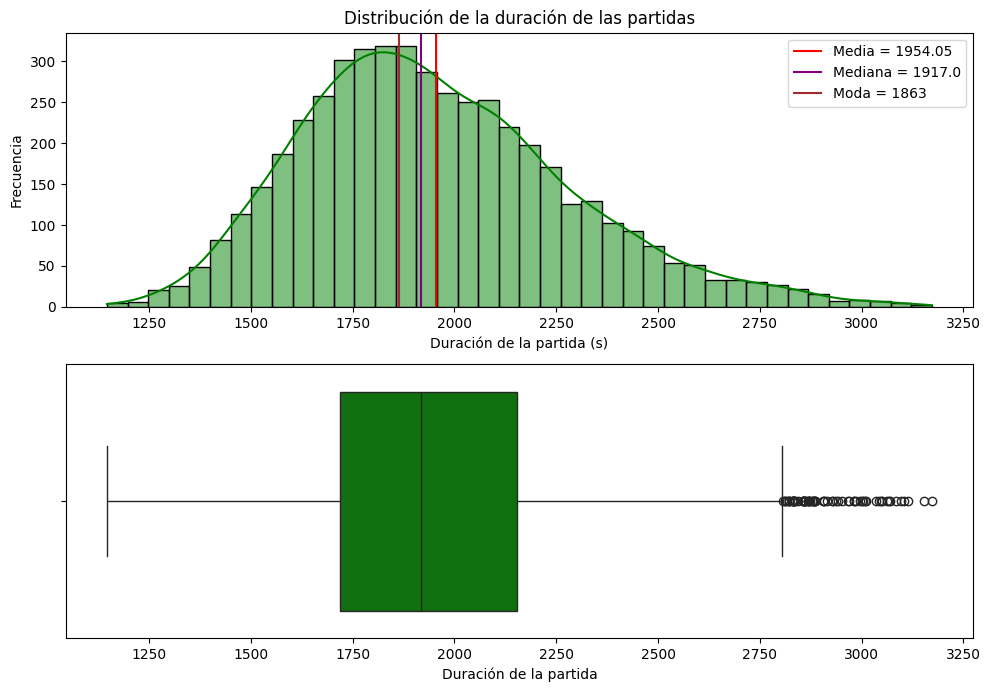

In [48]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.histplot(df, x="gamelength", kde=True, color="green")
plt.xlabel("Duración de la partida (s)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la duración de las partidas")
plt.axvline(gl_mean,color = "r", label = f"Media = {round(gl_mean,2)}")
plt.axvline(gl_median,color = "purple", label = f"Mediana = {round(gl_median,2)}")
plt.axvline(gl_mode[0],color = "brown", label = f"Moda = {round(gl_mode[0],2)}")
plt.legend()

plt.subplot(2,1,2)
sns.boxplot(x = df["gamelength"], legend=True, color="green")
plt.xlabel("Duración de la partida")

plt.tight_layout(pad=1)

### Parche

Text(0.5, 1.0, 'Comparación de la magnitud de los terremotos por magType')

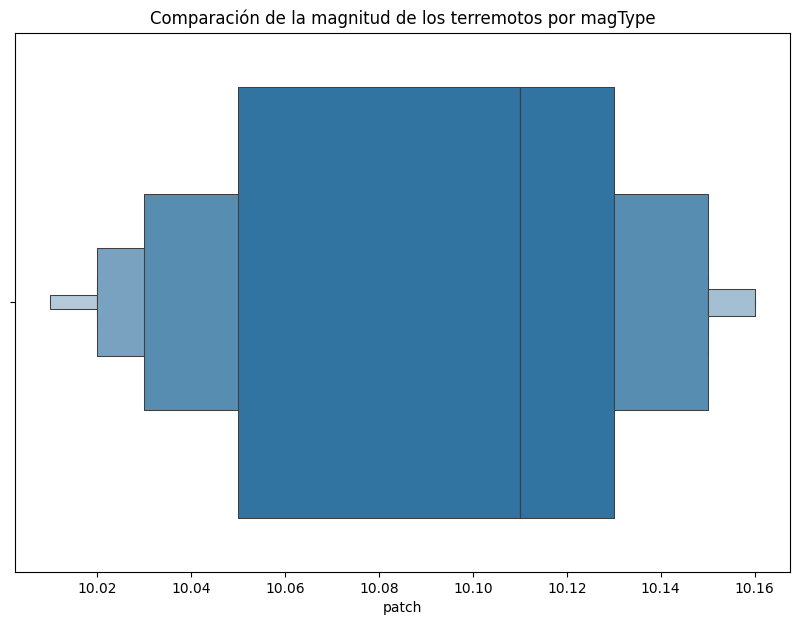

In [49]:
plt.figure(figsize=(10,7))

sns.boxenplot(
    x='patch', data=df[['patch']]
)
plt.title('Comparación de la magnitud de los terremotos por magType')

## Análisis Bivariante

Resultado vs Oro acumulado

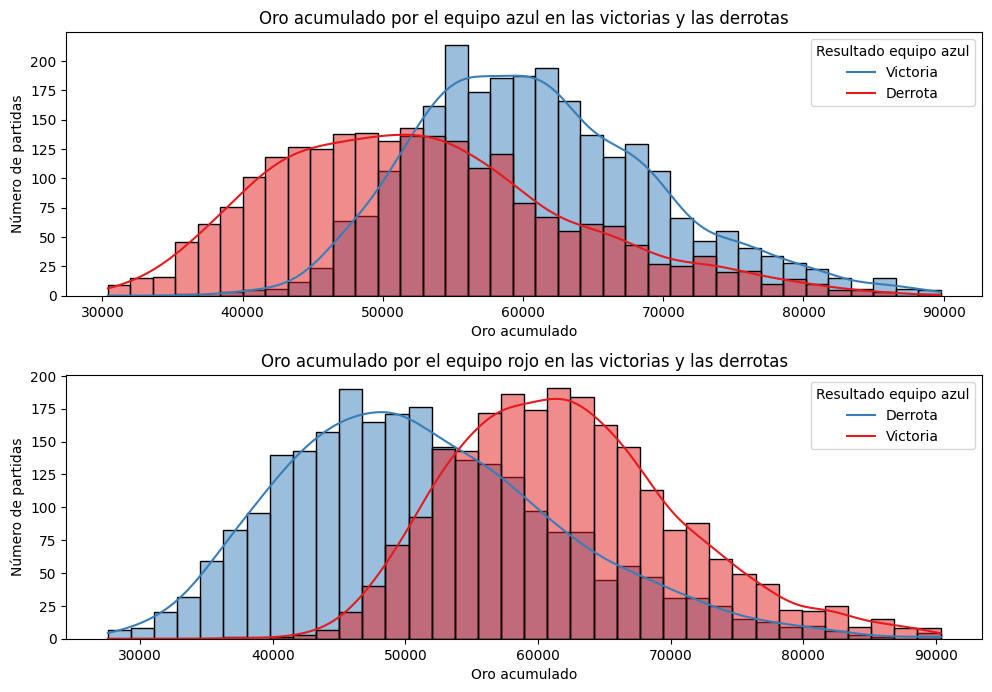

In [50]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
ax = sns.histplot(df, x="blue_totalgold", hue="result", kde=True, palette="Set1")
plt.xlabel("Oro acumulado")
plt.title("Oro acumulado por el equipo azul en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Victoria","Derrota"])
plt.subplot(2,1,2)
ax = sns.histplot(df, x="red_totalgold", hue="result", kde=True, palette="Set1")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Derrota","Victoria"])
plt.xlabel("Oro acumulado")
plt.title("Oro acumulado por el equipo rojo en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.tight_layout(pad=1)

Diferencia de oro total vs resultado

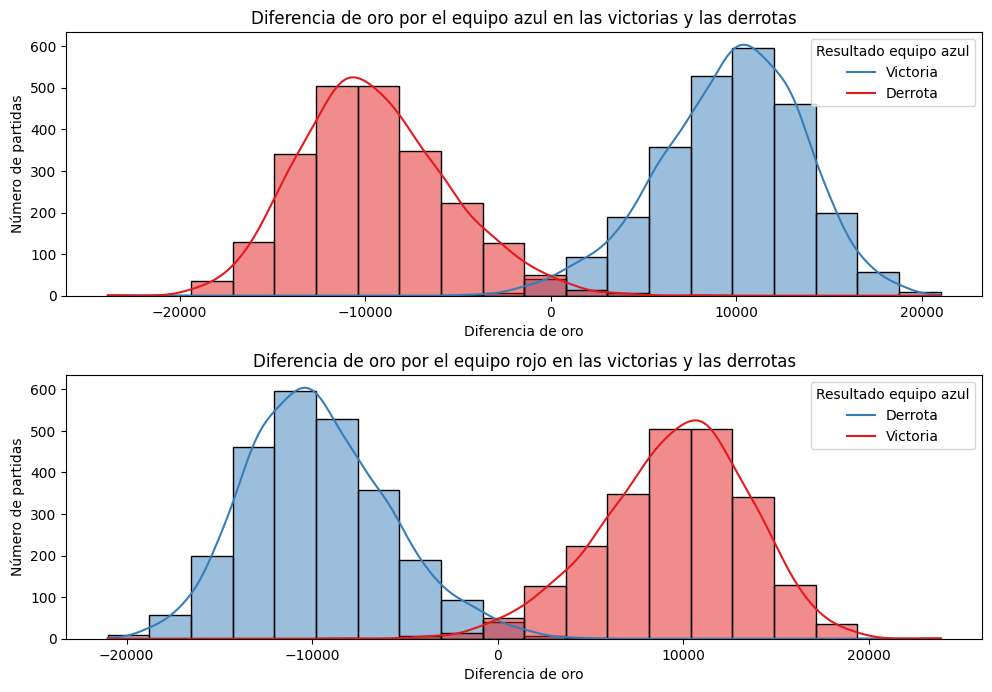

In [51]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
ax = sns.histplot(df, x="blue_totalgold_diff", hue="result", kde=True, palette="Set1")
plt.xlabel("Diferencia de oro")
plt.title("Diferencia de oro por el equipo azul en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Victoria","Derrota"])
plt.subplot(2,1,2)
ax = sns.histplot(df, x="red_totalgold_diff", hue="result", kde=True, palette="Set1")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Derrota","Victoria"])
plt.xlabel("Diferencia de oro")
plt.title("Diferencia de oro por el equipo rojo en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.tight_layout(pad=1)

Diferencia de oro vs oro total

Text(37.722222222222214, 0.5, 'Diferencia de oro')

<Figure size 1000x700 with 0 Axes>

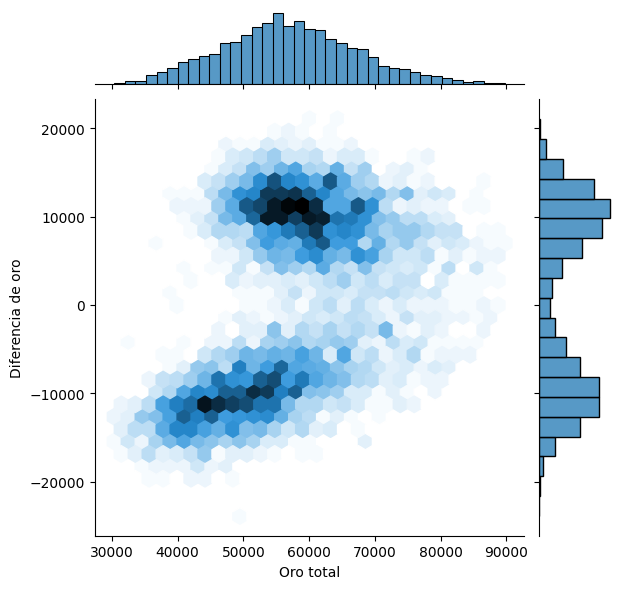

In [52]:
plt.figure(figsize=(10,7))

ax = sns.jointplot(data=df, x="blue_totalgold", y="blue_totalgold_diff", kind="hex")
plt.xlabel("Oro total")
plt.ylabel("Diferencia de oro")

Text(37.722222222222214, 0.5, 'Diferencia de oro')

<Figure size 1000x700 with 0 Axes>

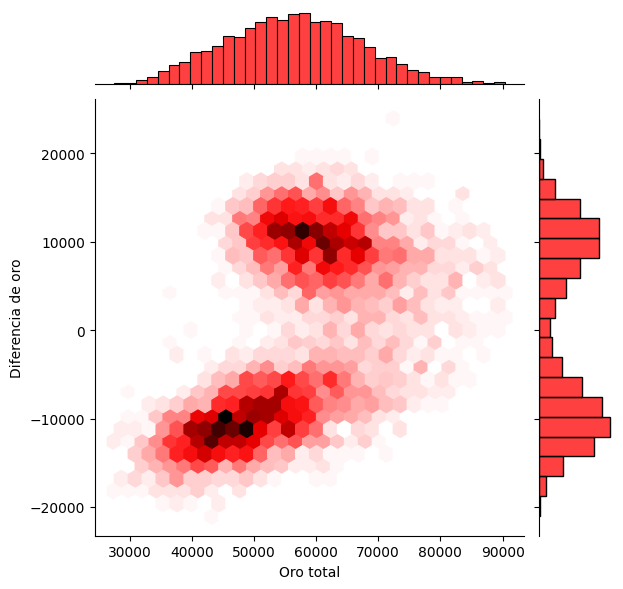

In [53]:
plt.figure(figsize=(10,7))
ax = sns.jointplot(data=df, x="red_totalgold", y="red_totalgold_diff", color="Red", kind="hex")
plt.xlabel("Oro total")
plt.ylabel("Diferencia de oro")

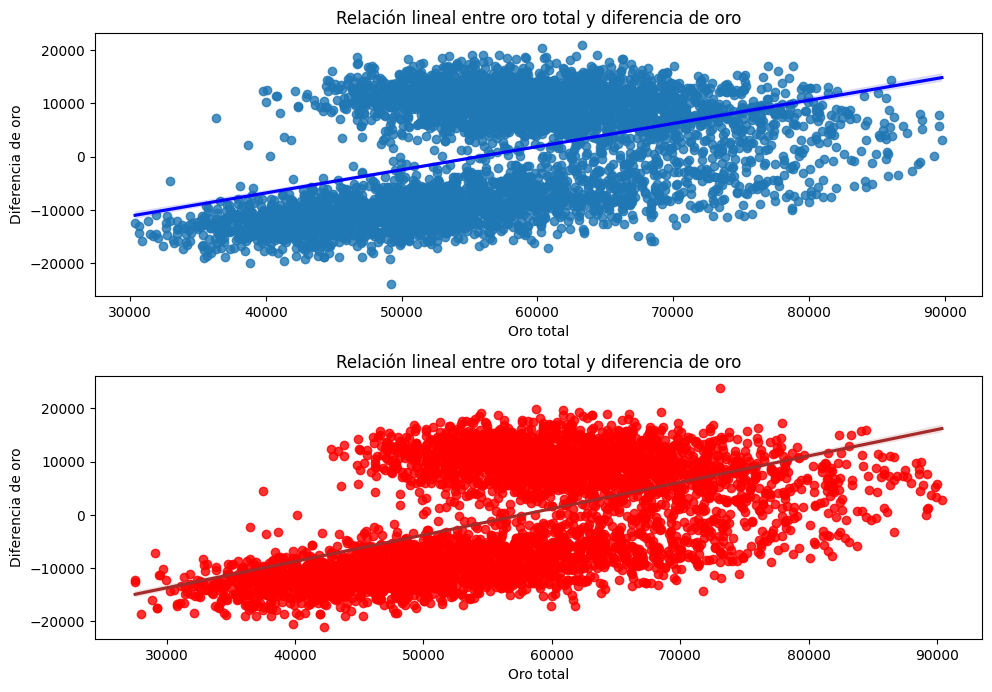

In [54]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
ax = sns.regplot(df, x="blue_totalgold", y="blue_totalgold_diff", line_kws=dict(color="b"))
plt.xlabel("Oro total")
plt.ylabel("Diferencia de oro")
plt.title("Relación lineal entre oro total y diferencia de oro")

plt.subplot(2,1,2)
ax = sns.regplot(df, x="red_totalgold", y="red_totalgold_diff", color="red", line_kws=dict(color="brown"))
plt.xlabel("Oro total")
plt.ylabel("Diferencia de oro")
plt.title("Relación lineal entre oro total y diferencia de oro")
plt.tight_layout(pad=1)

Resultado y oro gastado

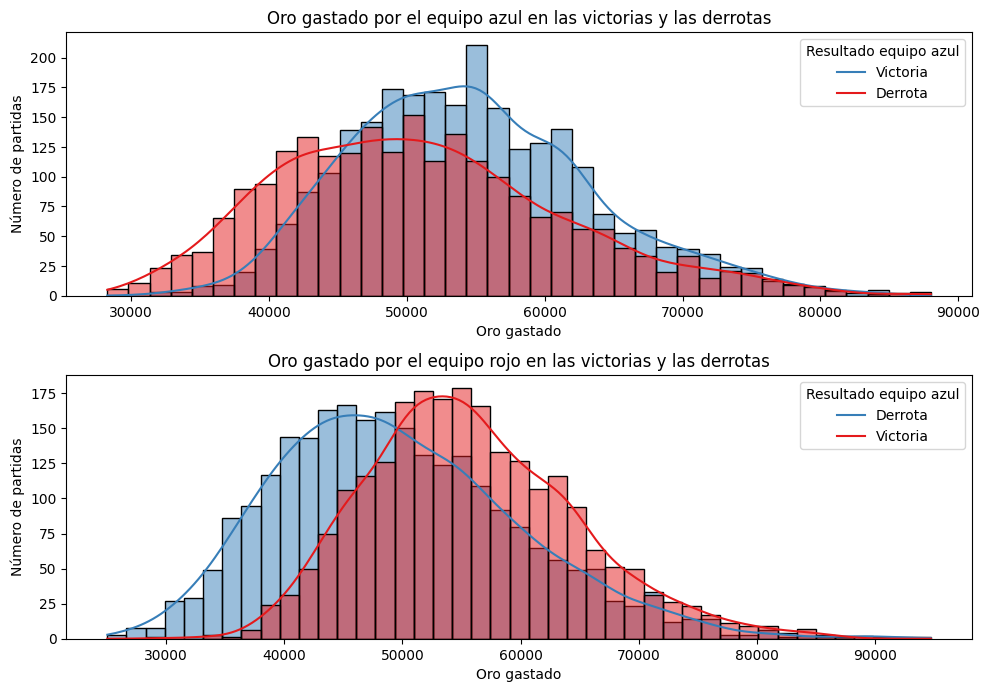

In [55]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
ax = sns.histplot(df, x="blue_spentgold", hue="result", kde=True, palette="Set1")
plt.xlabel("Oro gastado")
plt.title("Oro gastado por el equipo azul en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Victoria","Derrota"])
plt.subplot(2,1,2)
ax = sns.histplot(df, x="red_spentgold", hue="result", kde=True, palette="Set1")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Derrota","Victoria"])
plt.xlabel("Oro gastado")
plt.title("Oro gastado por el equipo rojo en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.tight_layout(pad=1)

Resultado y diferencia de oro gastado

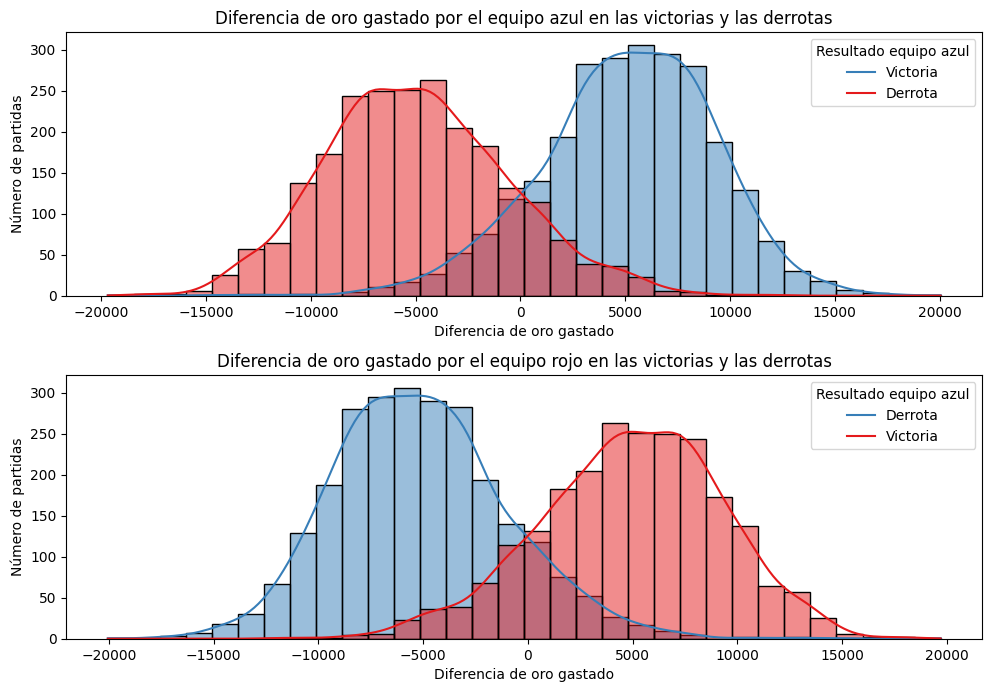

In [56]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
ax = sns.histplot(df, x="blue_spentgold_diff", hue="result", kde=True, palette="Set1")
plt.xlabel("Diferencia de oro gastado")
plt.title("Diferencia de oro gastado por el equipo azul en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Victoria","Derrota"])
plt.subplot(2,1,2)
ax = sns.histplot(df, x="red_spentgold_diff", hue="result", kde=True, palette="Set1")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Derrota","Victoria"])
plt.xlabel("Diferencia de oro gastado")
plt.title("Diferencia de oro gastado por el equipo rojo en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.tight_layout(pad=1)

Oro total y oro gastado

Text(37.722222222222214, 0.5, 'Oro gastado')

<Figure size 1000x700 with 0 Axes>

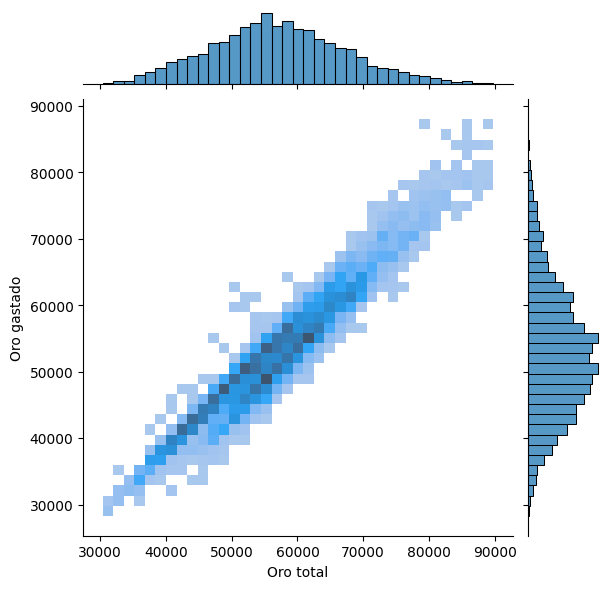

In [57]:
plt.figure(figsize=(10,7))

ax = sns.jointplot(data=df, x="blue_totalgold", y="blue_spentgold", kind="hist")
plt.xlabel("Oro total")
plt.ylabel("Oro gastado")

Text(37.722222222222214, 0.5, 'Oro gastado')

<Figure size 1000x700 with 0 Axes>

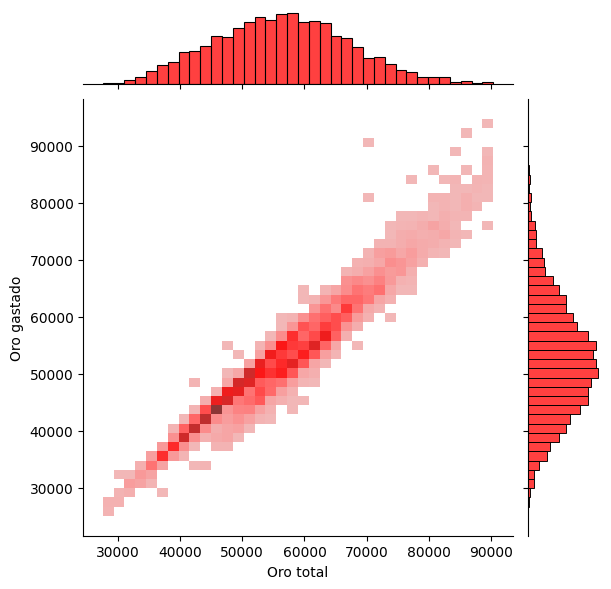

In [58]:
plt.figure(figsize=(10,7))

ax = sns.jointplot(data=df, x="red_totalgold", y="red_spentgold", kind="hist", color="red")
plt.xlabel("Oro total")
plt.ylabel("Oro gastado")

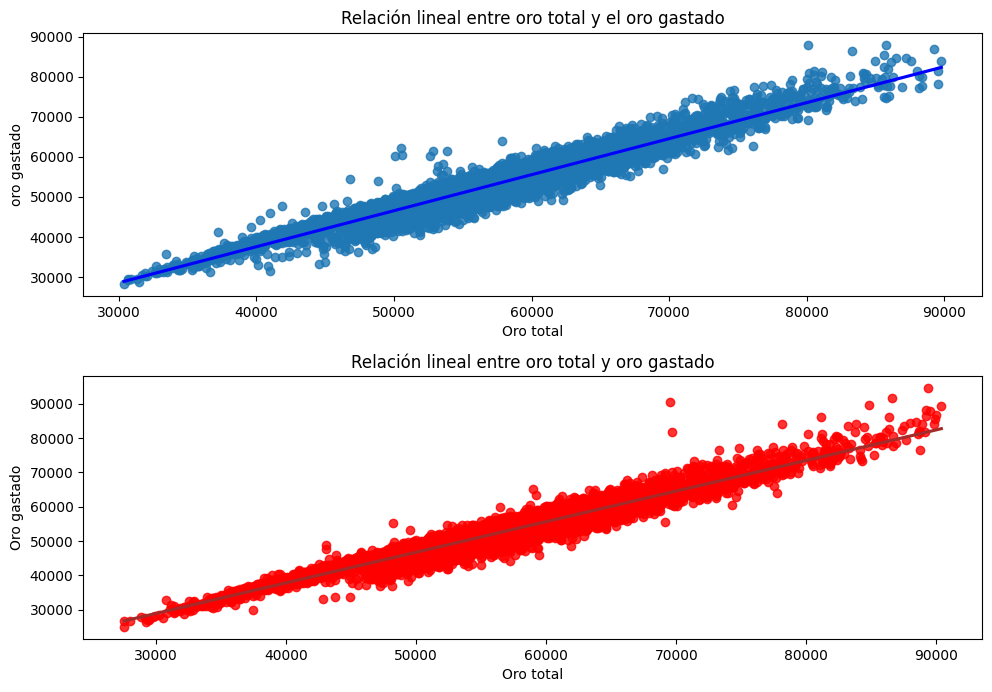

In [59]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
ax = sns.regplot(df, x="blue_totalgold", y="blue_spentgold", line_kws=dict(color="b"))
plt.xlabel("Oro total")
plt.ylabel("oro gastado")
plt.title("Relación lineal entre oro total y el oro gastado")

plt.subplot(2,1,2)
ax = sns.regplot(df, x="red_totalgold", y="red_spentgold", color="red", line_kws=dict(color="brown"))
plt.xlabel("Oro total")
plt.ylabel("Oro gastado")
plt.title("Relación lineal entre oro total y oro gastado")
plt.tight_layout(pad=1)

Torretas y resultado

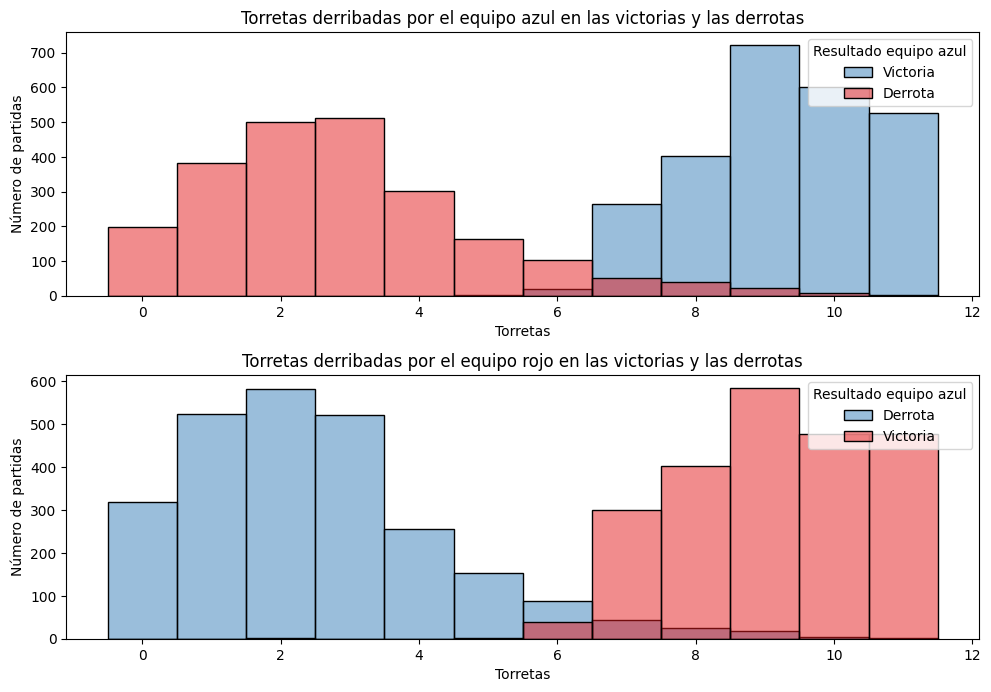

In [60]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
ax = sns.histplot(df, x="blue_towers", hue="result", discrete=True, palette="Set1")
plt.xlabel("Torretas")
plt.title("Torretas derribadas por el equipo azul en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Victoria","Derrota"])
plt.subplot(2,1,2)
ax = sns.histplot(df, x="red_towers", hue="result", discrete=True, palette="Set1")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Derrota","Victoria"])
plt.xlabel("Torretas")
plt.title("Torretas derribadas por el equipo rojo en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.tight_layout(pad=1)

Primera torreta y resultado

Text(0.5, 1.0, 'Victorias por lado')

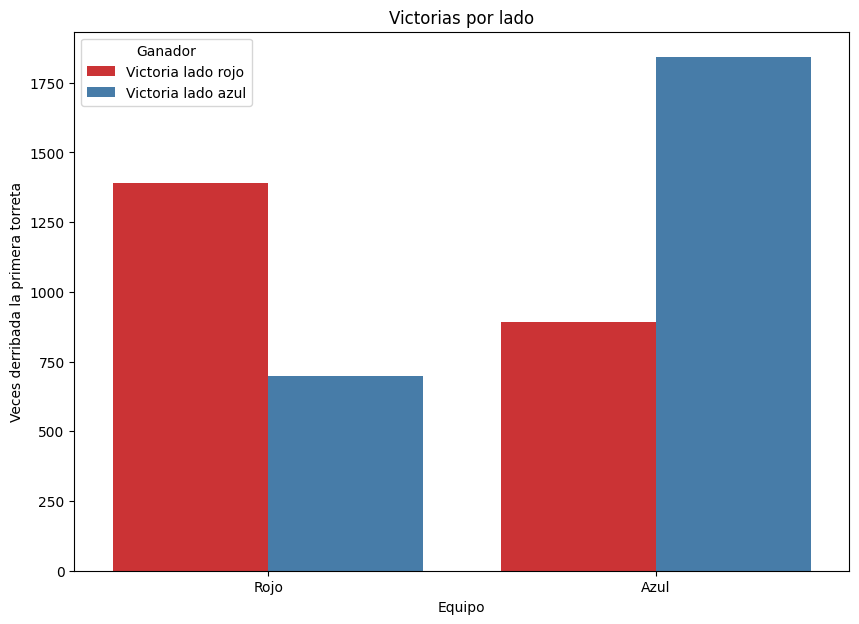

In [61]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='firsttower', hue='result', palette="Set1")
plt.xlabel("Equipo")
plt.ylabel("Veces derribada la primera torreta")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(title="Ganador", loc="upper left", labels=["Victoria lado rojo","Victoria lado azul"])
plt.title("Victorias por lado")

Primera torreta de medio y resultado

Text(0.5, 1.0, 'Victorias por lado')

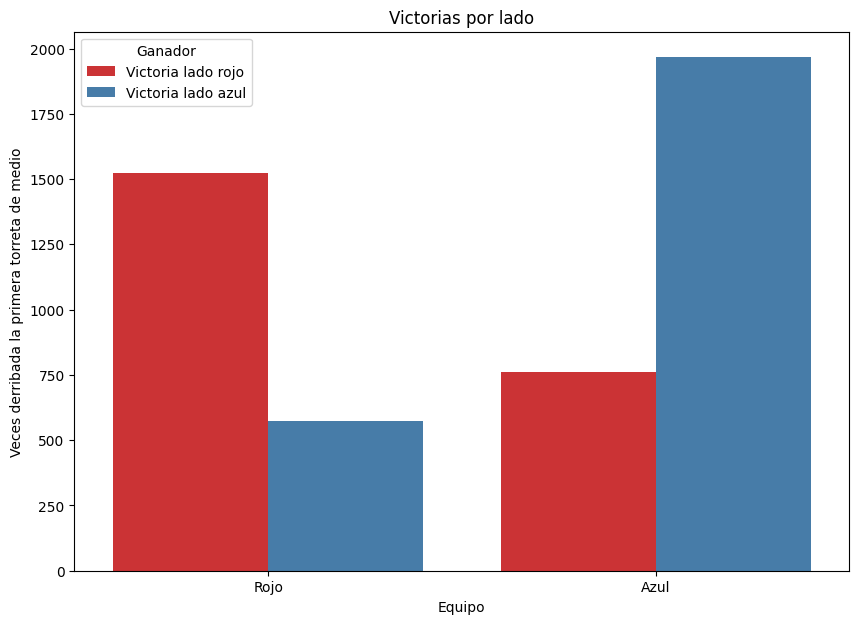

In [62]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='firstmidtower', hue='result', palette="Set1")
plt.xlabel("Equipo")
plt.ylabel("Veces derribada la primera torreta de medio")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(title="Ganador", loc="upper left", labels=["Victoria lado rojo","Victoria lado azul"])
plt.title("Victorias por lado")

Anillo exterior y resultado

Text(0.5, 1.0, 'Victorias por lado')

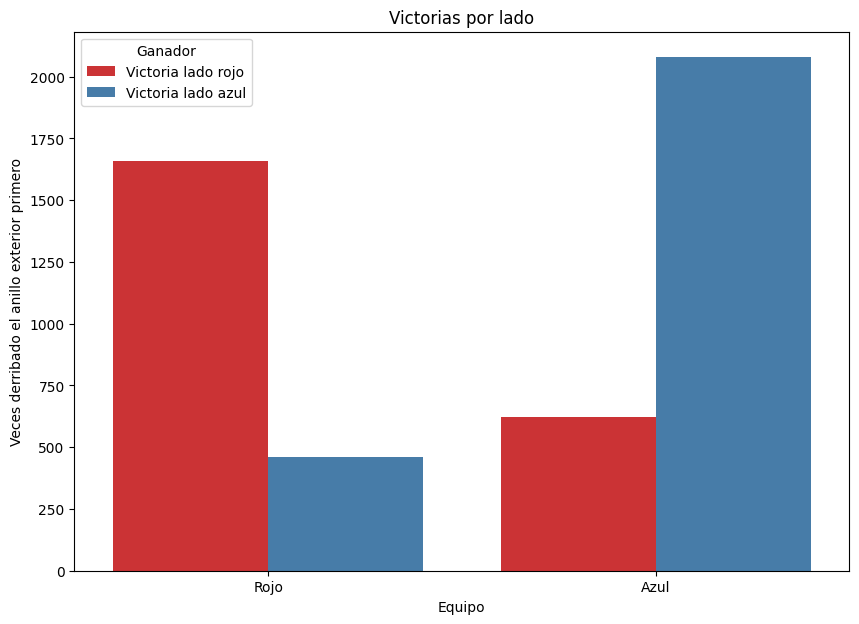

In [63]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='firsttothreetowers', hue='result', palette="Set1")
plt.xlabel("Equipo")
plt.ylabel("Veces derribado el anillo exterior primero")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(title="Ganador", loc="upper left", labels=["Victoria lado rojo","Victoria lado azul"])
plt.title("Victorias por lado")

Torretas y oro

Text(0.5, 1.0, 'Oro total y torretas derribadas en equipo azul')

<Figure size 1000x700 with 0 Axes>

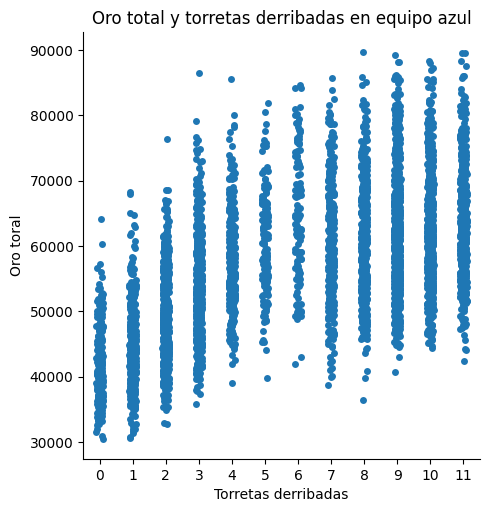

In [72]:
plt.figure(figsize=(10,7))
sns.catplot(df, x="blue_towers", y="blue_totalgold")
plt.xlabel("Torretas derribadas")
plt.ylabel("Oro toral")
plt.title("Oro total y torretas derribadas en equipo azul")

Text(0.5, 1.0, 'Oro total y torretas derribadas en equipo rojo')

<Figure size 1000x700 with 0 Axes>

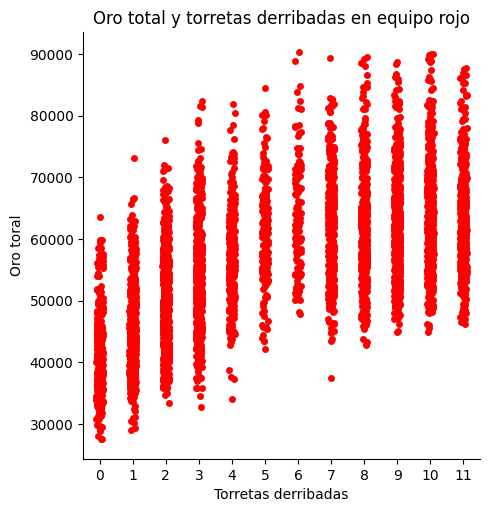

In [70]:
plt.figure(figsize=(10,7))
sns.catplot(df, x="red_towers", y="red_totalgold", color="Red")
plt.xlabel("Torretas derribadas")
plt.ylabel("Oro toral")
plt.title("Oro total y torretas derribadas en equipo rojo")

Primer heraldo y oro

Text(0.5, 1.0, 'Victorias por lado')

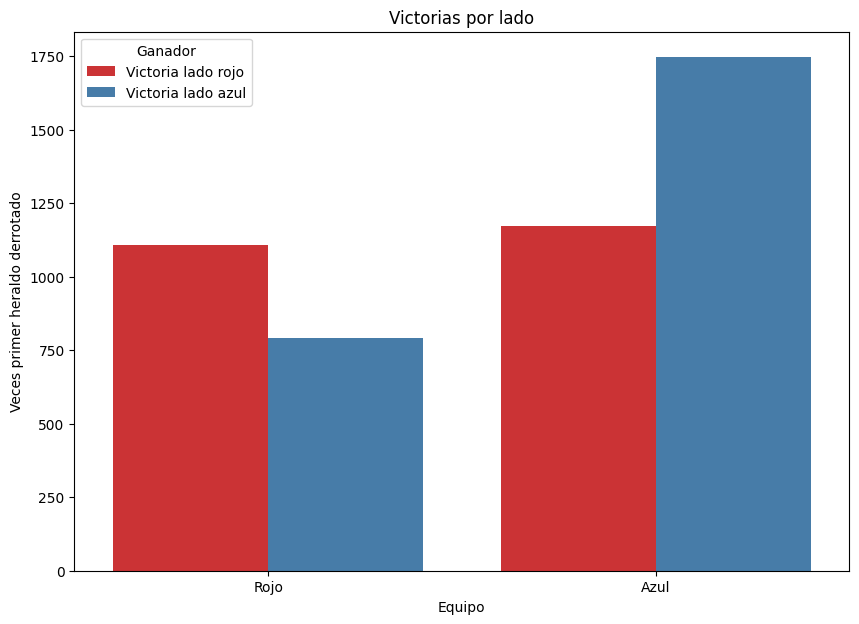

In [73]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='firstherald', hue='result', palette="Set1")
plt.xlabel("Equipo")
plt.ylabel("Veces primer heraldo derrotado")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(title="Ganador", loc="upper left", labels=["Victoria lado rojo","Victoria lado azul"])
plt.title("Victorias por lado")

Primer heraldo y primera torre

Text(0.5, 1.0, 'Victorias por lado')

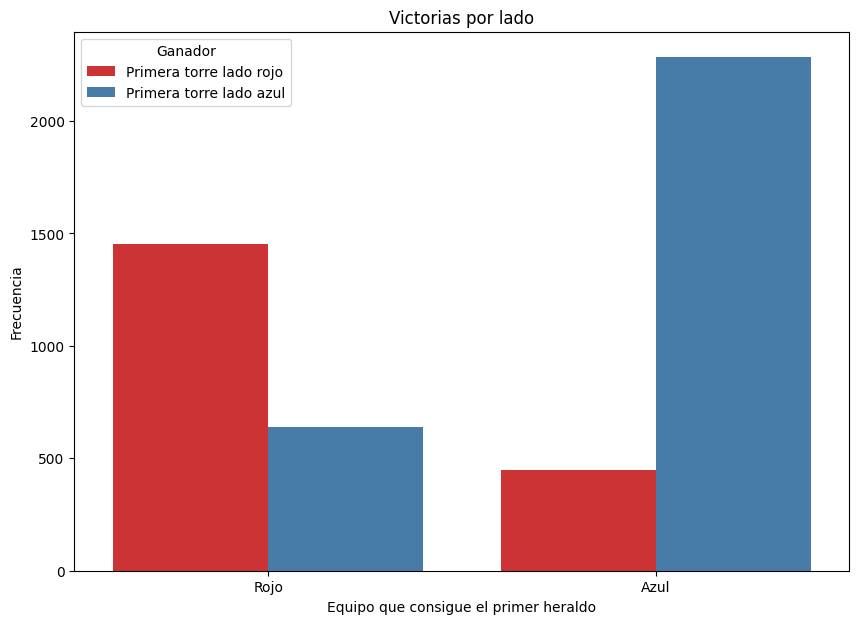

In [80]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='firsttower', hue='firstherald', palette="Set1")
plt.xlabel("Equipo que consigue el primer heraldo")
plt.ylabel("Frecuencia")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(title="Ganador", loc="upper left", labels=["Primera torre lado rojo","Primera torre lado azul"])
plt.title("Victorias por lado")

Heraldos y torres

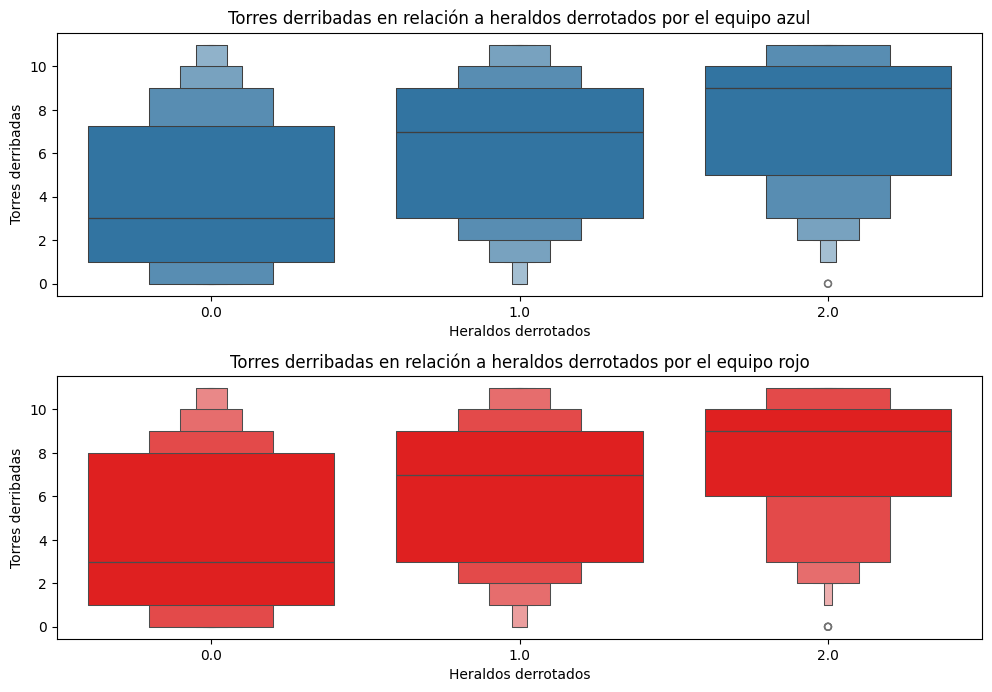

In [93]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.boxenplot(df,x="blue_heralds", y = "blue_towers")
plt.title("Torres derribadas en relación a heraldos derrotados por el equipo azul")
plt.xlabel("Heraldos derrotados")
plt.ylabel("Torres derribadas")

plt.subplot(2,1,2)
sns.boxenplot(df,x="red_heralds", y = "red_towers", color="Red")
plt.title("Torres derribadas en relación a heraldos derrotados por el equipo rojo")
plt.xlabel("Heraldos derrotados")
plt.ylabel("Torres derribadas")

plt.tight_layout(pad=1)

Primer barón y resultado

Text(0.5, 1.0, 'Victorias por lado')

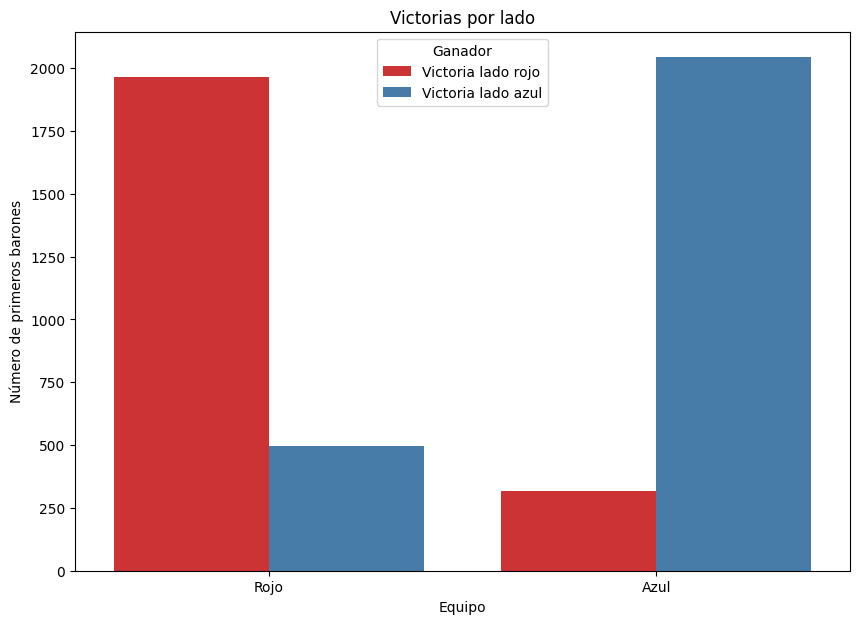

In [98]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='firstbaron', hue='result', palette="Set1")
plt.xlabel("Equipo")
plt.ylabel("Número de primeros barones")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(title="Ganador", loc="upper center", labels=["Victoria lado rojo","Victoria lado azul"])
plt.title("Victorias por lado")

Numero de barones y victorias

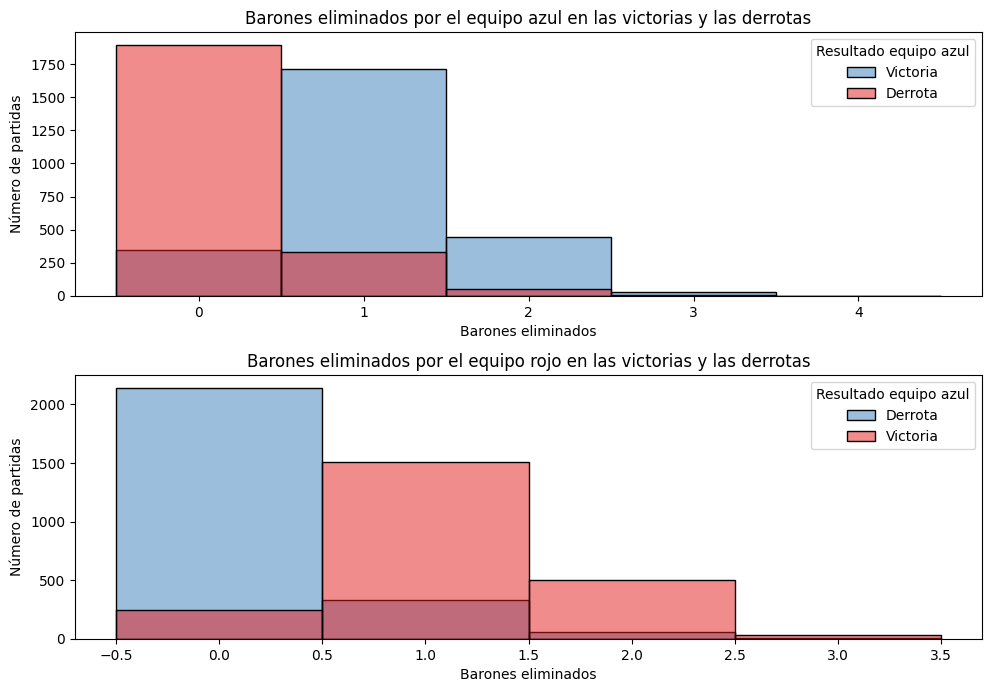

In [110]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
ax = sns.histplot(df, x="blue_barons", hue="result", palette="Set1", discrete=True)
plt.xlabel("Barones eliminados")
plt.title("Barones eliminados por el equipo azul en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Victoria","Derrota"])
plt.subplot(2,1,2)
ax = sns.histplot(df, x="red_barons", hue="result", palette="Set1", discrete=True)
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Derrota","Victoria"])
plt.xlabel("Barones eliminados")
plt.title("Barones eliminados por el equipo rojo en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.tight_layout(pad=1)

Barones y torres

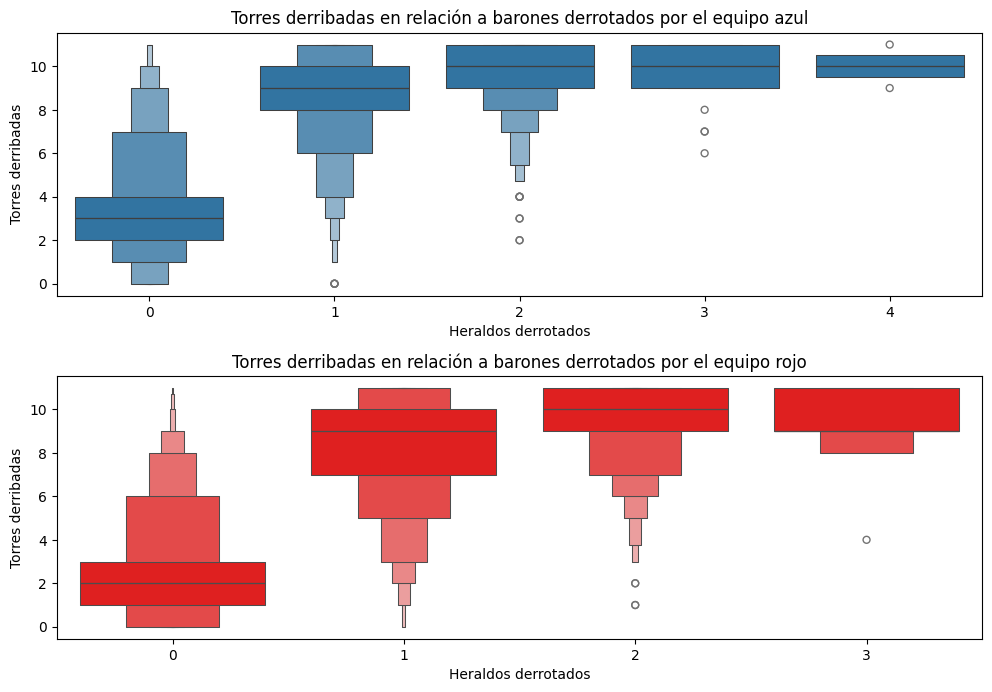

In [114]:
plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
sns.boxenplot(df, x="blue_barons", y="blue_towers")
plt.title("Torres derribadas en relación a barones derrotados por el equipo azul")
plt.xlabel("Heraldos derrotados")
plt.ylabel("Torres derribadas")

plt.subplot(2,1,2)
sns.boxenplot(df,x="red_barons", y = "red_towers", color="Red")
plt.title("Torres derribadas en relación a barones derrotados por el equipo rojo")
plt.xlabel("Heraldos derrotados")
plt.ylabel("Torres derribadas")

plt.tight_layout(pad=1)

Primer dragon y resultado

Text(0.5, 1.0, 'Victorias por lado')

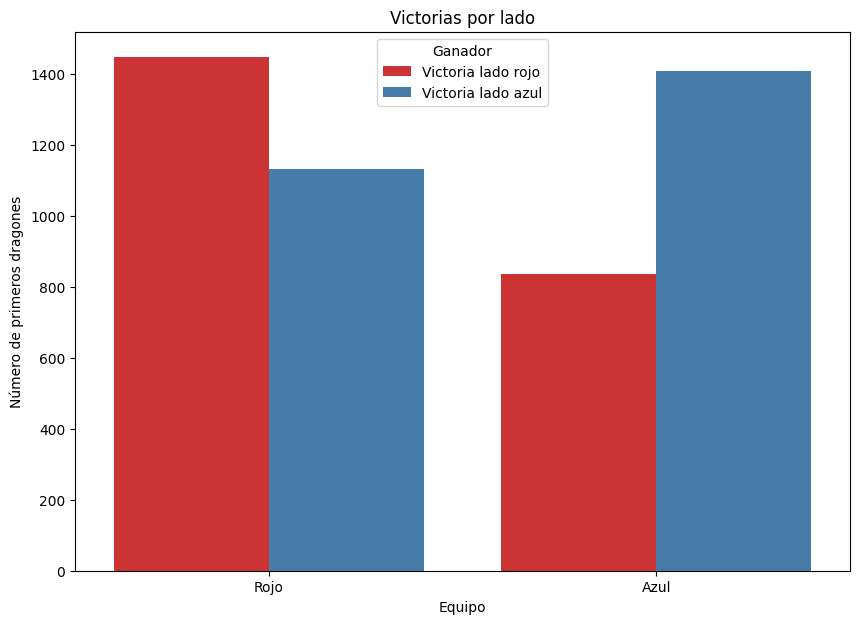

In [115]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='firstdragon', hue='result', palette="Set1")
plt.xlabel("Equipo")
plt.ylabel("Número de primeros dragones")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(title="Ganador", loc="upper center", labels=["Victoria lado rojo","Victoria lado azul"])
plt.title("Victorias por lado")

Dragones elementales y resultado

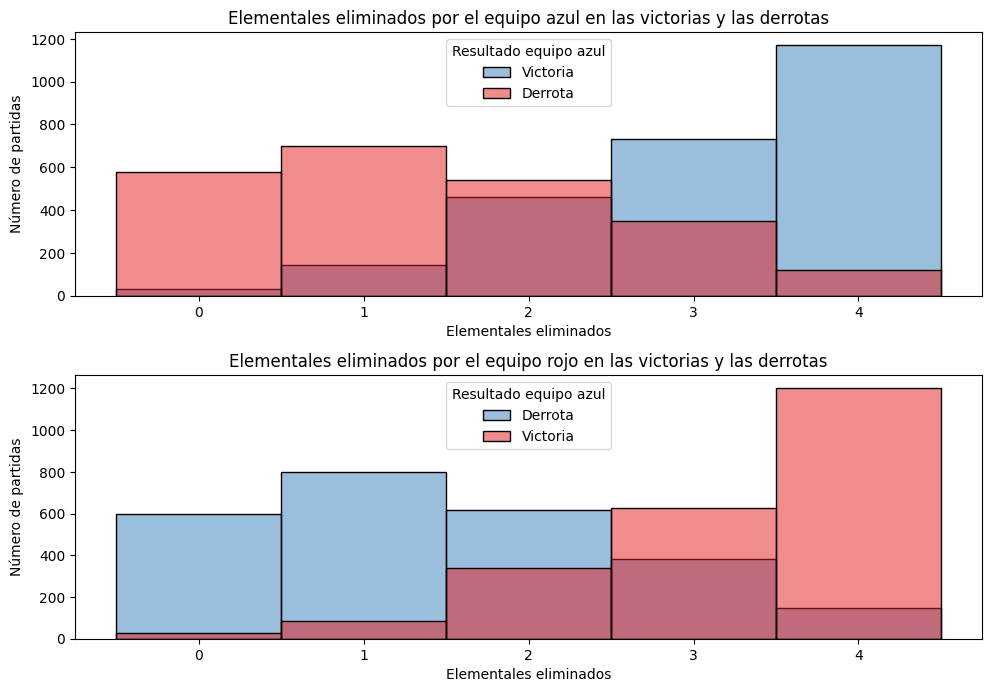

In [118]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
ax = sns.histplot(df, x="blue_elementaldrakes", hue="result", palette="Set1", discrete=True)
plt.xlabel("Elementales eliminados")
plt.title("Elementales eliminados por el equipo azul en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.legend(title="Resultado equipo azul", loc="upper center", labels=["Victoria","Derrota"])
plt.subplot(2,1,2)
ax = sns.histplot(df, x="red_elementaldrakes", hue="result", palette="Set1", discrete=True)
plt.legend(title="Resultado equipo azul", loc="upper center", labels=["Derrota","Victoria"])
plt.xlabel("Elementales eliminados")
plt.title("Elementales eliminados por el equipo rojo en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.tight_layout(pad=1)

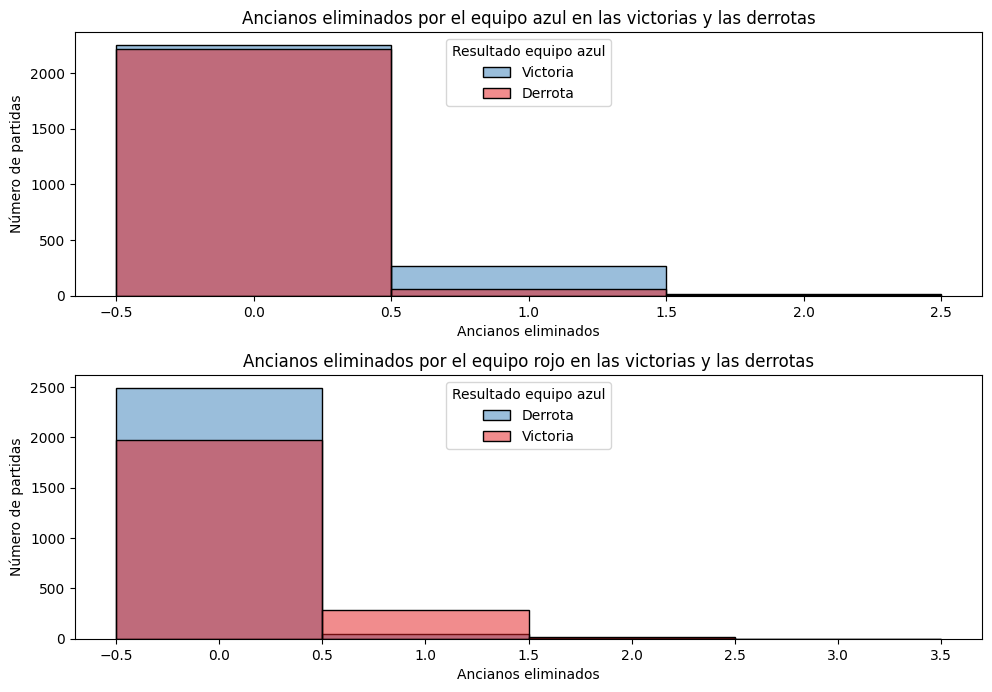

In [119]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
ax = sns.histplot(df, x="blue_elders", hue="result", palette="Set1", discrete=True)
plt.xlabel("Ancianos eliminados")
plt.title("Ancianos eliminados por el equipo azul en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.legend(title="Resultado equipo azul", loc="upper center", labels=["Victoria","Derrota"])
plt.subplot(2,1,2)
ax = sns.histplot(df, x="red_elders", hue="result", palette="Set1", discrete=True)
plt.legend(title="Resultado equipo azul", loc="upper center", labels=["Derrota","Victoria"])
plt.xlabel("Ancianos eliminados")
plt.title("Ancianos eliminados por el equipo rojo en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.tight_layout(pad=1)

Total de dragones y resultado

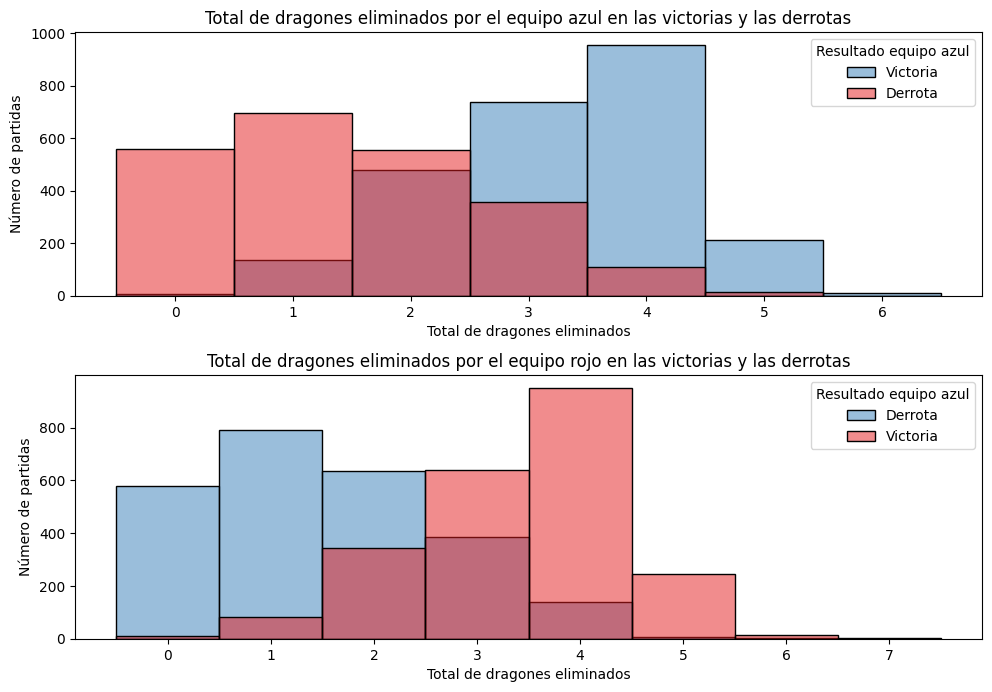

In [122]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
ax = sns.histplot(df, x="blue_dragons", hue="result", palette="Set1", discrete=True)
plt.xlabel("Total de dragones eliminados")
plt.title("Total de dragones eliminados por el equipo azul en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Victoria","Derrota"])
plt.subplot(2,1,2)
ax = sns.histplot(df, x="red_dragons", hue="result", palette="Set1", discrete=True)
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Derrota","Victoria"])
plt.xlabel("Total de dragones eliminados")
plt.title("Total de dragones eliminados por el equipo rojo en las victorias y las derrotas")
plt.ylabel("Número de partidas")
plt.tight_layout(pad=1)

Primera torre y primer dragon

Text(0.5, 1.0, 'Dragones tras primera torre')

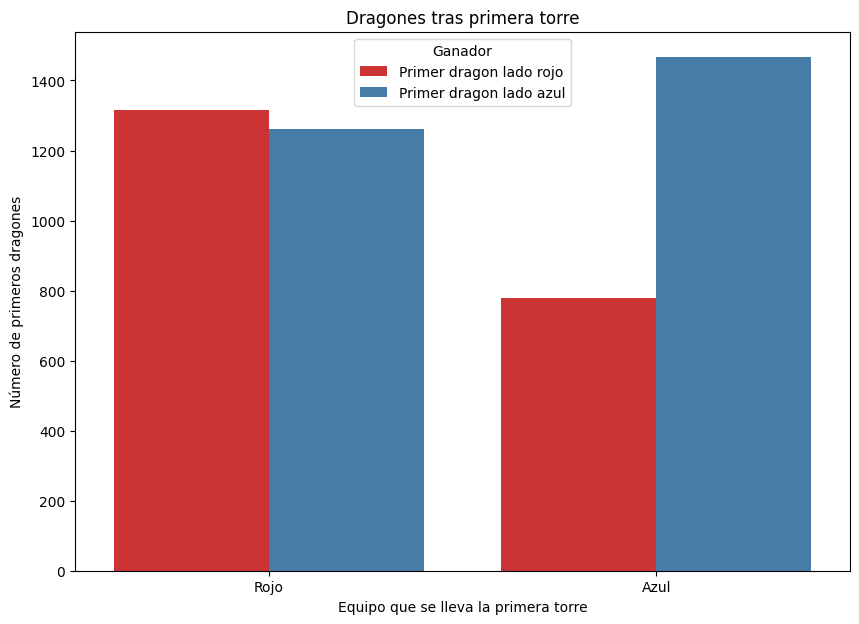

In [124]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='firstdragon', hue='firstmidtower', palette="Set1")
plt.xlabel("Equipo que se lleva la primera torre")
plt.ylabel("Número de primeros dragones")
plt.xticks([0,1], ["Rojo", "Azul"])
plt.legend(title="Ganador", loc="upper center", labels=["Primer dragon lado rojo","Primer dragon lado azul"])
plt.title("Dragones tras primera torre")

Duración de la partida y resultado

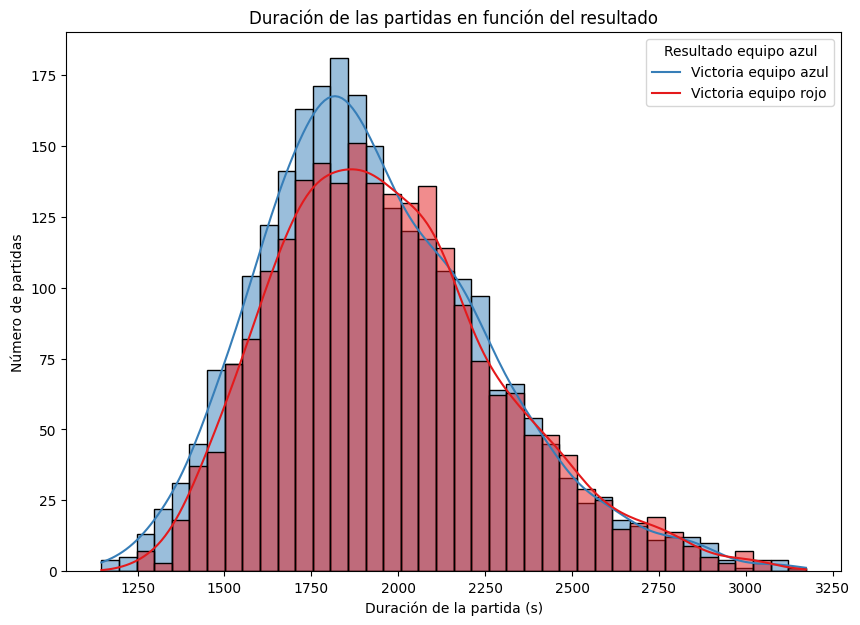

In [139]:
plt.figure(figsize=(10,7))

ax = sns.histplot(df, x="gamelength", hue="result", palette="Set1", kde=True)
plt.xlabel("Duración de la partida (s)")
plt.title("Duración de las partidas en función del resultado")
plt.ylabel("Número de partidas")
plt.legend(title="Resultado equipo azul", loc="upper right", labels=["Victoria equipo azul","Victoria equipo rojo"])

Parche y resultado

In [129]:
len(df["patch"].unique())

15

Text(0.5, 1.0, 'Dragones tras primera torre')

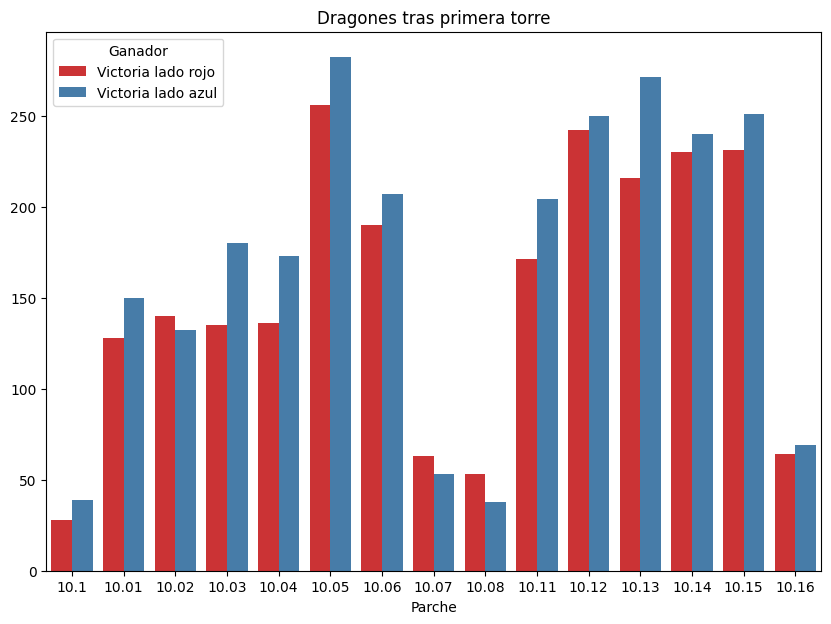

In [134]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=df, x='patch', hue='result', palette="Set1")
plt.xlabel("Parche")
plt.ylabel("")
plt.xticks(range(15), [10.1 , 10.01, 10.02, 10.03, 10.04, 10.05, 10.06, 10.07, 10.08,
       10.11, 10.12, 10.13, 10.14, 10.15, 10.16])
plt.legend(title="Ganador", loc="upper left", labels=["Victoria lado rojo","Victoria lado azul"])
plt.title("Dragones tras primera torre")

Parche y duración de las partidas

In [173]:
parche = sns.dark_palette("seagreen")

C:\Users\camil\AppData\Local\Temp\ipykernel_13172\380338610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.stripplot(df, y="gamelength", x= "patch", palette=parche)
C:\Users\camil\AppData\Local\Temp\ipykernel_13172\380338610.py:5: UserWarning: 
The palette list has fewer values (6) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax= sns.stripplot(df, y="gamelength", x= "patch", palette=parche)


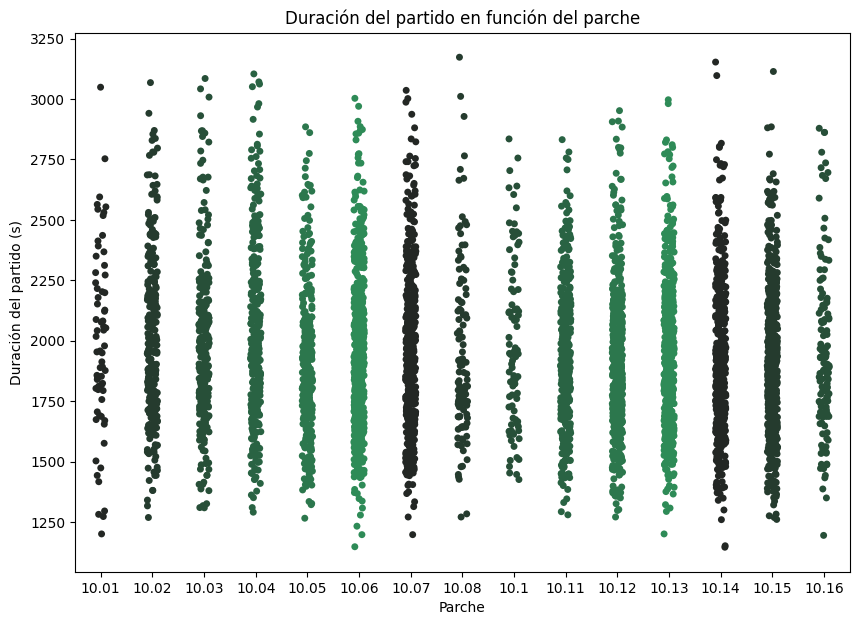

In [175]:
plt.figure(figsize=(10,7))
plt.title("Duración del partido en función del parche")
plt.xlabel("Parche")
plt.ylabel("Duración del partido (s)")
ax= sns.stripplot(df, y="gamelength", x= "patch", palette=parche)

## Análisis Multivariante